# SOCIAL NETWORK ANALYSIS GROUP PROJECT

Group Members: Federico Pallesi, Riccardo Baldini, Andrea Goberti, Sebastien Junior Foumane, Mateusz Waglowski

### INTRODUCTION
The graph we've chosen is based on the fantasy movie *Avatar*. Indeed, all nodes represent particular characters who took part in the movie, whiled edges indicate same scene appearance.
It is extremely important to remember that this is an **UNDIRECTED** and **WEIGHTED** graph, which means that all edges can be traversed from both directions and that nodes can weight differently.
In this particulare case, the number of nodes is 30 and the number of edges is 105.

In [1]:
# Import packages
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv

# Load the CSV files into pandas DataFrames
edges_df = pd.read_csv(r"C:\Users\test\Desktop\SNA Project\Avatar\edges.csv")
nodes_df = pd.read_csv(r"C:\Users\test\Desktop\SNA Project\Avatar\nodes.csv")

# WEEK 1
For the first week we were asked to address the following tasks:
1) Choose the network
2) Graph representation
3) Computation of:
    - Number of nodes and edges
    - Average Degree
    - Density

In [2]:
# Creating an undirected graph using NetworkX built-in functions
G = nx.Graph()

with open(r"C:\Users\test\Desktop\SNA Project\Avatar\edges.csv", "r", newline="") as file:
    file_reader = csv.DictReader(file)

    for row in file_reader:                        
            source_node = int(row["Source"])       
            target_node = int(row["Target"])
            weight_node = int(row["Weight"])

            G.add_edge(source_node, target_node, weight=weight_node) 

node_degrees = G.degree()
degree_values = [node_degrees[node] for node in G.nodes()]
edge_weights = [G[u][v]['weight'] / 3 for u, v in G.edges()]

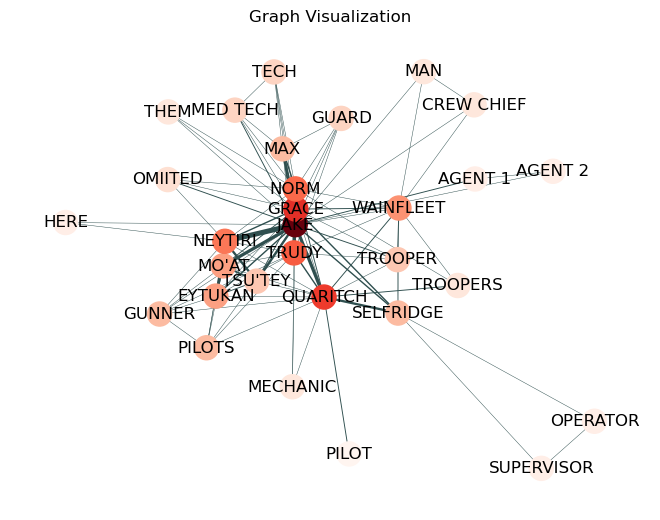

In [3]:
# Add nodes to the graph from nodes_df
for _, row in nodes_df.iterrows():
    G.add_node(row['Id'], label=row['Label'])

# Add edges to the graph from edges_df
for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')

nx.draw(
    G,
    pos,
    labels = labels, 
    with_labels = True, 
    node_color = degree_values, 
    edge_color = 'darkslategray',
    cmap=plt.cm.Reds,
    width=edge_weights
    )

plt.title('Graph Visualization')
plt.show() 

In [4]:
dict_characters = {}
with open(r"C:\Users\test\Desktop\SNA Project\Avatar\nodes.csv", "r", newline="") as file:
    file_reader = csv.DictReader(file)
    for row in file_reader:
        id = int(row["Id"])
        name_characters = row["Label"]
        dict_characters[id] = name_characters

print(f"The characters are represented by the following nodes: {dict_characters}")

The characters are represented by the following nodes: {519631: 'JAKE', 520100: 'QUARITCH', 520425: 'SELFRIDGE', 520314: 'GRACE', 520156: 'NORM', 520010: 'WAINFLEET', 520859: 'TRUDY', 521727: 'NEYTIRI', 520197: 'MAX', 522131: 'EYTUKAN', 522179: "MO'AT", 525975: 'TROOPER', 519777: 'AGENT 1', 519783: 'AGENT 2', 519965: 'CREW CHIEF', 525884: 'GUARD', 525633: 'GUNNER', 521836: 'HERE', 520084: 'MAN', 520927: 'MECHANIC', 519861: 'MED TECH', 523228: 'OMIITED', 524836: 'OPERATOR', 527499: 'PILOT', 525709: 'PILOTS', 524846: 'SUPERVISOR', 520592: 'TECH', 524282: 'THEM', 520779: 'TROOPERS', 522064: "TSU'TEY"}


### Graph Interpretation
Suddenly we notice that node 519631 (coincidentally the protagonist, Jake) plays a pivotal role in the movie, as he appears in most scenes with several differente characters from the movie.
We also notice that the graph is a bit dense, but we'll dive deeper into that in a few lines of code.

In [5]:
# Calculating the number of nodes and edges
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()
print(f"Number of Nodes: {number_nodes}")
print(f"Number of Edges: {number_edges}")

# Calculating the average degree
degrees = [val for (node, val) in G.degree()]
average_degree = sum(degrees) / len(degrees)
print(f"Average Degree: {average_degree}")

# Calculating the graph density
density = nx.density(G)
print(f"Graph Density: {density}")

Number of Nodes: 30
Number of Edges: 105
Average Degree: 7.0
Graph Density: 0.2413793103448276


Indeed, what we deduced just from glancing at the graph is confirmed from these computations. The `density` value of `0.24` suggests that approximately 24% of all possible connections eventually happen. Obviously a full graph would have a value of `1`, therefore this density is a witness to a lightly dense graph. Furthermore, an `average degree` of 7 suggests that a node is connected to 7 other, on average.

---

# WEEK 2
For the second week we were asked to address the following tasks:
1) Find the largest component to work with
2) Compute:
    - Average clustering coefficient
    - Transitivity
3) Develop custom transitivity formula

In [6]:
check_for_connectivity= nx.is_connected(G)
print(check_for_connectivity)

# Find every connected components
connected_components = list(nx.connected_components(G))

# Find the largest component
largest_component = max(connected_components)

# Create a subgraph of the largest component
largest_subgraph = G.subgraph(largest_component)
print(f"Nodes that are part of the largest component: {largest_component}")
print(f"Length of the largest component: {len(largest_component)}")

True
Nodes that are part of the largest component: {520197, 527499, 525709, 520592, 522131, 520084, 525975, 520859, 519965, 520100, 524836, 524846, 519861, 525884, 525633, 522179, 520010, 520779, 519631, 522064, 520156, 523228, 520927, 519777, 524282, 519783, 520425, 521836, 520314, 521727}
Length of the largest component: 30


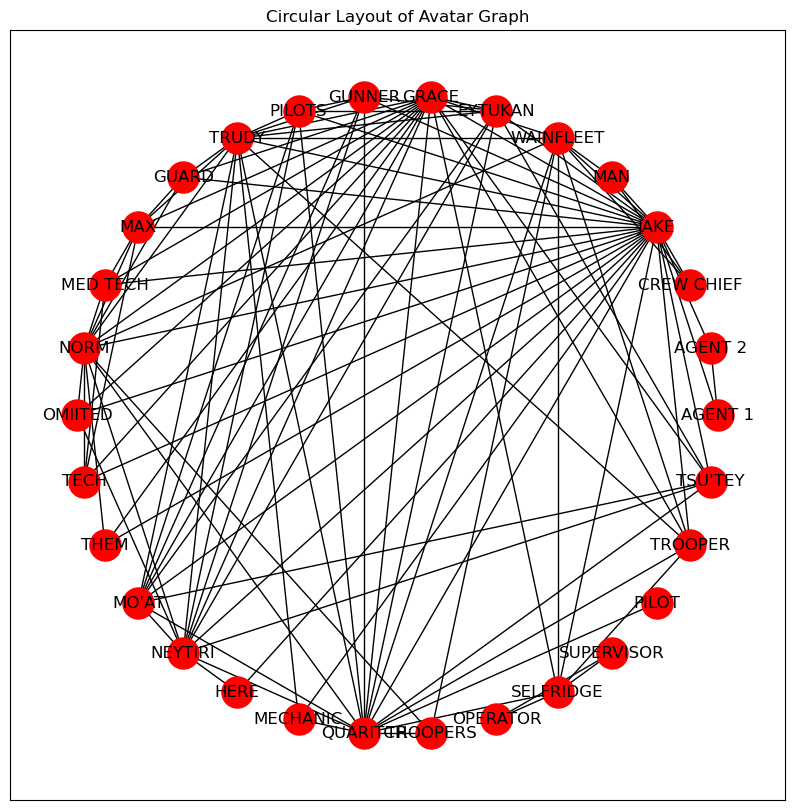

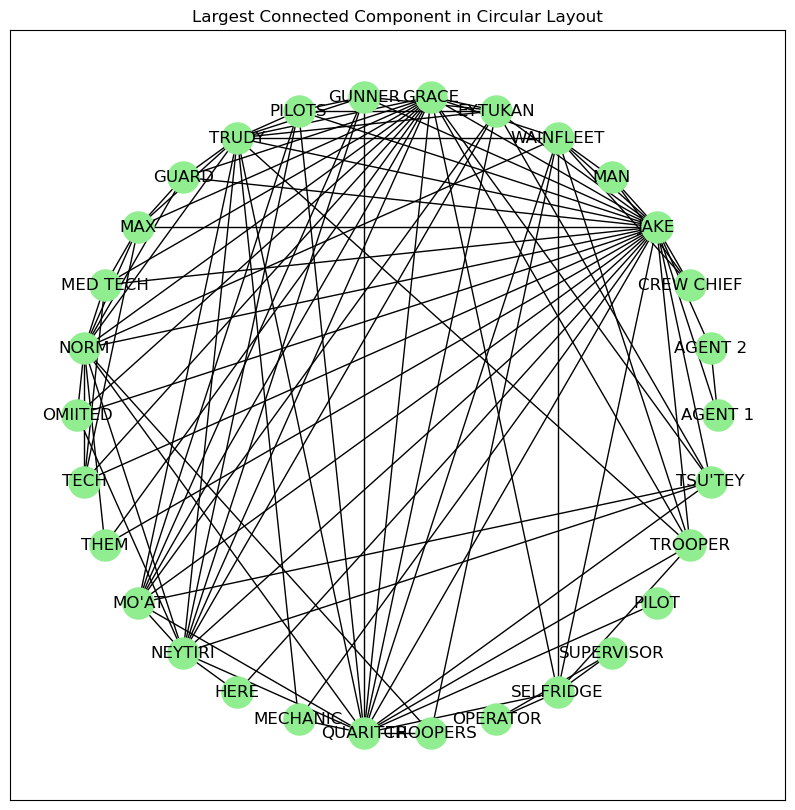

In [7]:
# Draw the graph
plt.figure(figsize=(10, 10))
position = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos=position, node_color='red', node_size=500)
nx.draw_networkx_labels(G, pos=position, labels=nx.get_node_attributes(G, 'label'))
nx.draw_networkx_edges(G, pos=position)
plt.title("Circular Layout of Avatar Graph")
plt.show()


# Draw the largest subgraph
plt.figure(figsize=(10, 10))
pos_subgraph = nx.circular_layout(largest_subgraph)
nx.draw_networkx_nodes(largest_subgraph, pos=pos_subgraph, node_color='lightgreen', node_size=500)
nx.draw_networkx_labels(largest_subgraph, pos=pos_subgraph, labels=nx.get_node_attributes(largest_subgraph, 'label'))
nx.draw_networkx_edges(largest_subgraph, pos=pos_subgraph)
plt.title("Largest Connected Component in Circular Layout")
plt.show()


If our graph G was missing out on multiple node connections, by drawing the subgraph, we would notice a significant difference in number of nodes and edges.
However, by drawing both the full graph G and the subgraph of it, we notice that they are the same: this, infact, means that we're looking at a fully connected graph, where each node is linked to every other node.

 Now onto some metrics ;)

In [8]:
# Compute avarage clustering coefficent without using networkx built-in function 
def custom_average_clustering_coefficient(G):
    total_clustering = 0
    num_nodes = len(G)

    for node in G:
        neighbors = list(G.neighbors(node))
        number_neighbors = len(neighbors)

        # Skip nodes with fewer than 2 neighbors beacuse they can't make a triangle
        if number_neighbors < 2:
            continue

        # Count the number of edges between the neighbors of the current node
        existing_links = 0
        for i in range(number_neighbors):
            for j in range(i + 1, number_neighbors):
                if G.has_edge(neighbors[i], neighbors[j]):
                    existing_links += 1

        # Number of possible edges between neighbors
        possible_links = number_neighbors * (number_neighbors - 1) / 2

        clustering_coefficient = existing_links / possible_links
        total_clustering += clustering_coefficient

    return total_clustering / num_nodes if num_nodes > 0 else 0
print("Custom made average clustering coefficient: ", custom_average_clustering_coefficient(G))

# Compute average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {avg_clustering}")


# Compute transitivity without using networkx built-in functions
def custom_transitivity(G):
    triangles = 0
    connected_triples = 0

    for node in G:
        neighbors = list(G.neighbors(node))
        num_neighbors = len(neighbors)

        # Each pair of neighbors forms a potential triple with the node
        connected_triples += num_neighbors * (num_neighbors - 1) / 2

        # Count triangles by checking each pair of neighbors
        for i in range(num_neighbors):
            for j in range(i + 1, num_neighbors):
                if G.has_edge(neighbors[i], neighbors[j]):
                    triangles += 1

    # Divide triangles by 3 to correct for over-counting
    triangles = triangles / 3

    if connected_triples == 0:
        return 0 
    return 3 * triangles / connected_triples
print("Custom made transitivity: ",custom_transitivity(G))

# Compute transitivity with built-in function
transitivity = nx.transitivity(G)
print(f"Transitivity: {transitivity}")

Custom made average clustering coefficient:  0.8042951884716592
Average Clustering Coefficient: 0.804295188471659
Custom made transitivity:  0.5009276437847866
Transitivity: 0.5009276437847866


Let us specify that we admitted networkx' built-in functions only to demonstrate that our custom functions actually complete correctly the tasks.
Moving to the interpretation of results, we notice quite a difference between average clustering and transitivity: this leads us to believe that the graph alternates hot zones (*intense clusters*) to poorly connected zones.

---

# WEEK 3
For the third week we were asked to address the following tasks:
1) Choose and compute a centrality measure
2) Comment on the outcome
3) Plot the cumulative distribution for the centrality


In [9]:
def bfs_weighted(graph, source):
    distances = {node: float('inf') for node in graph.nodes}
    distances[source] = 0 
    queue = deque([(0, source)]) 

    while queue:
        current_distance, current_node = queue.popleft()
        for neighbor in graph.neighbors(current_node):
            distance = current_distance + graph[current_node][neighbor]['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                queue.append((distance, neighbor))
    return distances

def compute_closeness_centrality(G):
    closeness_centrality = {}
    total_nodes = len(G.nodes())

    for node in G.nodes():
        shortest_paths = {n: float('inf') for n in G.nodes()}
        shortest_paths[node] = 0
        queue = [node]
        visited = {node}

        while queue:
            current = queue.pop(0)
            for neighbor in G.neighbors(current):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)
                    shortest_paths[neighbor] = shortest_paths[current] + 1

        path_sum = sum(shortest_paths.values())
        closeness_centrality[node] = (total_nodes - 1) / path_sum if path_sum > 0 else 0

    return closeness_centrality

# Compute closeness centrality for the full graph
closeness_centrality = compute_closeness_centrality(G)

# Find the most central node
most_central_node = max(closeness_centrality, key=closeness_centrality.get)
most_central_value = closeness_centrality[most_central_node]

# We limit the number of nodes' centrality displayed aesthetics
N = 5 
top_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:N]

print(f"Top {N} nodes by closeness centrality:")
for node, centrality in top_nodes:
    print(f"Node {node}: {centrality}")

print(f"\nMost central node: {most_central_node} with closeness centrality {most_central_value}")


Top 5 nodes by closeness centrality:
Node 519631: 0.8787878787878788
Node 520314: 0.7073170731707317
Node 520100: 0.6904761904761905
Node 520859: 0.6304347826086957
Node 520156: 0.6170212765957447

Most central node: 519631 with closeness centrality 0.8787878787878788



Since we're looking at a fully connected graph, we believe that `closeness centrality` is the most insightful metric. Indeed, closeness centrality highlights the most accessible nodes, hinting at which nodes can reach the other the fastest.
The output shows that the most accessible node is again 519631, the protagonist.


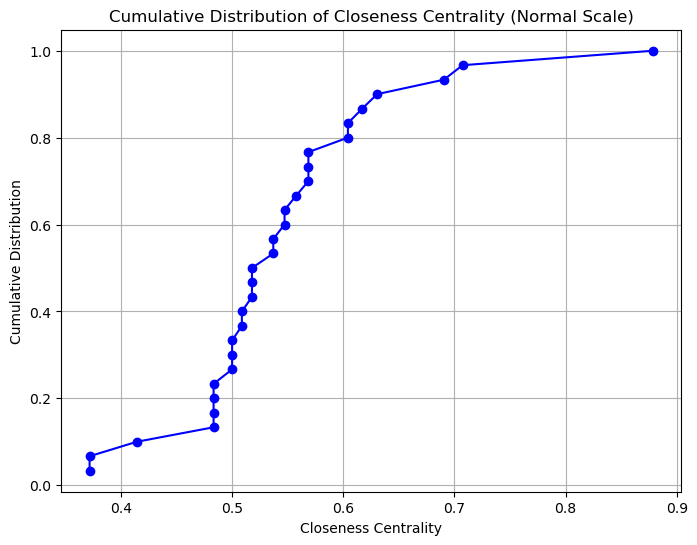

In [10]:
def compute_cumulative_distribution(centrality_values):
    sorted_centrality = np.sort(list(centrality_values.values()))
    
    # Compute the cumulative distribution
    cumulative = np.arange(1, len(sorted_centrality) + 1) / len(sorted_centrality)
    
    return sorted_centrality, cumulative

# Get the sorted centrality values and cumulative distribution
sorted_centrality, cumulative_distribution = compute_cumulative_distribution(closeness_centrality)

# Plotting the cumulative distribution
plt.figure(figsize=(8, 6))
plt.plot(sorted_centrality, cumulative_distribution, marker='o', linestyle='-', color='b')
plt.title('Cumulative Distribution of Closeness Centrality (Normal Scale)')
plt.xlabel('Closeness Centrality')
plt.ylabel('Cumulative Distribution')
plt.grid(True)
plt.show()

# WEEK 5
For the fifth week we were asked to address the following tasks:
1) Perform PageRank algorithm on graph and identify the node with highest value
2) Compare outcomes with week 3

In [11]:
# We create an unweighted/undirected graph for computation's sake
G_uw = nx.Graph()
G_uw.add_nodes_from(G.nodes(data=True))
G_uw.add_edges_from((u, v) for u, v, _ in G.edges(data=True))

# PageRank calculation
pagerank_values = nx.pagerank(G_uw, alpha=0.15, weight=None)

# Finding the node with the highest PageRank value
max_node = max(pagerank_values, key=pagerank_values.get)
max_value = pagerank_values[max_node]

print(f"The node with the highest PageRank value is: {max_node}. Its with value is: {max_value}")

The node with the highest PageRank value is: 519631. Its with value is: 0.05315704204477864


The fact that PageRank and Closeness centrality yielded the same result, suggests that highly ranked nodes by PageRank are also central in terms of proximity to other nodes. This simmetry hints at the fact that the network structure enables influential nodes to be easily reachable from other parts of the network.

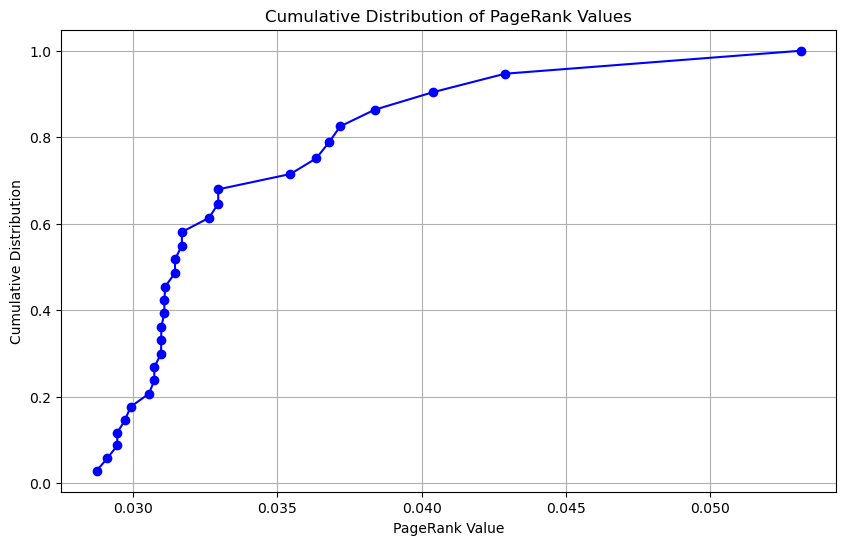

In [12]:
pagerank_values_list = sorted(pagerank_values.values())

# Cumulative distribution
cumulative_values = np.cumsum(pagerank_values_list) / np.sum(pagerank_values_list)

# Plotting the cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot(pagerank_values_list, cumulative_values, marker='o', linestyle='-', color='b')
plt.xlabel('PageRank Value')
plt.ylabel('Cumulative Distribution')
plt.title('Cumulative Distribution of PageRank Values')
plt.grid(True)
plt.show()

# Part 2

In [13]:
def kcore_and_kshell(G):
    kcore_dict = {}
    kshell_dict = {}

    # Get the maximum degree manually
    max_degree = max([len(list(G.neighbors(node))) for node in G])

    for k in range(0, max_degree + 1):
        G_copy = G.copy()
        
        # Remove nodes until all nodes have degree >= k
        removed_nodes = True
        while removed_nodes:
            removed_nodes = False
            nodes_to_remove = []
            for node in G_copy.nodes():
                if G_copy.degree(node) < k:
                    nodes_to_remove.append(node)
                    removed_nodes = True

            # Remove nodes with degree < k
            for node in nodes_to_remove:
                G_copy.remove_node(node)

        # Nodes remaining in G_copy are part of the k-core
        kcore_dict[k] = list(G_copy.nodes())

        # For k-shell: nodes in k-core but not in (k+1)-core
        if k < max_degree:
            G_copy_next = G.copy()
            removed_nodes = True
            while removed_nodes:
                removed_nodes = False
                nodes_to_remove = []
                for node in G_copy_next.nodes():
                    if G_copy_next.degree(node) < k + 1:
                        nodes_to_remove.append(node)
                        removed_nodes = True

                # Remove nodes with degree < k + 1
                for node in nodes_to_remove:
                    G_copy_next.remove_node(node)

            # Nodes in k-core but not in (k+1)-core
            k_shell_nodes = set(G_copy.nodes()) - set(G_copy_next.nodes())
            kshell_dict[k] = list(k_shell_nodes)
    
    return kcore_dict, kshell_dict


kcore_dict, kshell_dict = kcore_and_kshell(G_uw)
print("K-core:", kcore_dict)
print("K-shell:", kshell_dict)


K-core: {0: [519777, 519783, 519965, 519631, 520084, 520010, 522131, 520314, 525633, 525709, 520859, 525884, 520197, 519861, 520156, 523228, 520592, 524282, 522179, 521727, 521836, 520927, 520100, 520779, 524836, 520425, 524846, 527499, 525975, 522064], 1: [519777, 519783, 519965, 519631, 520084, 520010, 522131, 520314, 525633, 525709, 520859, 525884, 520197, 519861, 520156, 523228, 520592, 524282, 522179, 521727, 521836, 520927, 520100, 520779, 524836, 520425, 524846, 527499, 525975, 522064], 2: [519777, 519783, 519965, 519631, 520084, 520010, 522131, 520314, 525633, 525709, 520859, 525884, 520197, 519861, 520156, 523228, 520592, 524282, 522179, 521727, 521836, 520927, 520100, 520779, 524836, 520425, 524846, 525975, 522064], 3: [519965, 519631, 520084, 520010, 522131, 520314, 525633, 525709, 520859, 525884, 520197, 519861, 520156, 523228, 520592, 524282, 522179, 521727, 520927, 520100, 520779, 520425, 525975, 522064], 4: [519631, 520010, 522131, 520314, 525633, 525709, 520859, 525884,

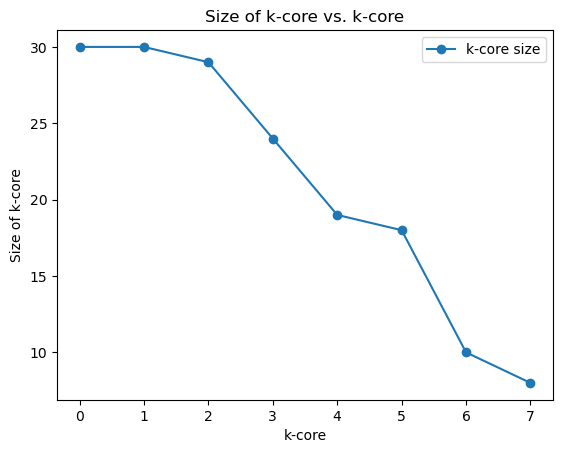

In [14]:
ks = []
core_sizes = []

# Collect only non-empty cores
for k, nodes in kcore_dict.items():
    # Only append the size if nodes list is not empty
    if nodes:
        ks.append(k)
        core_sizes.append(len(nodes))  

plt.plot(ks, core_sizes, marker='o', label="k-core size")
plt.xlabel('k-core')
plt.ylabel('Size of k-core')
plt.title('Size of k-core vs. k-core')
plt.legend()
plt.show()

# WEEK 6
For the sixth week we were asked to address the following tasks:
1) Implement Bridge Removal, Modularity optimization and label propagation
2) Compare each result in terms of:
    - number of detected clusters
    - cluster size distribution
    - computational time
    - modularity
3) Give an interpretation to the three partitions and choose the best
4) Provide a visualization for the partition
5) Compute NMI for each pair of partitions and discuss the outcomes

Is the graph connected? True


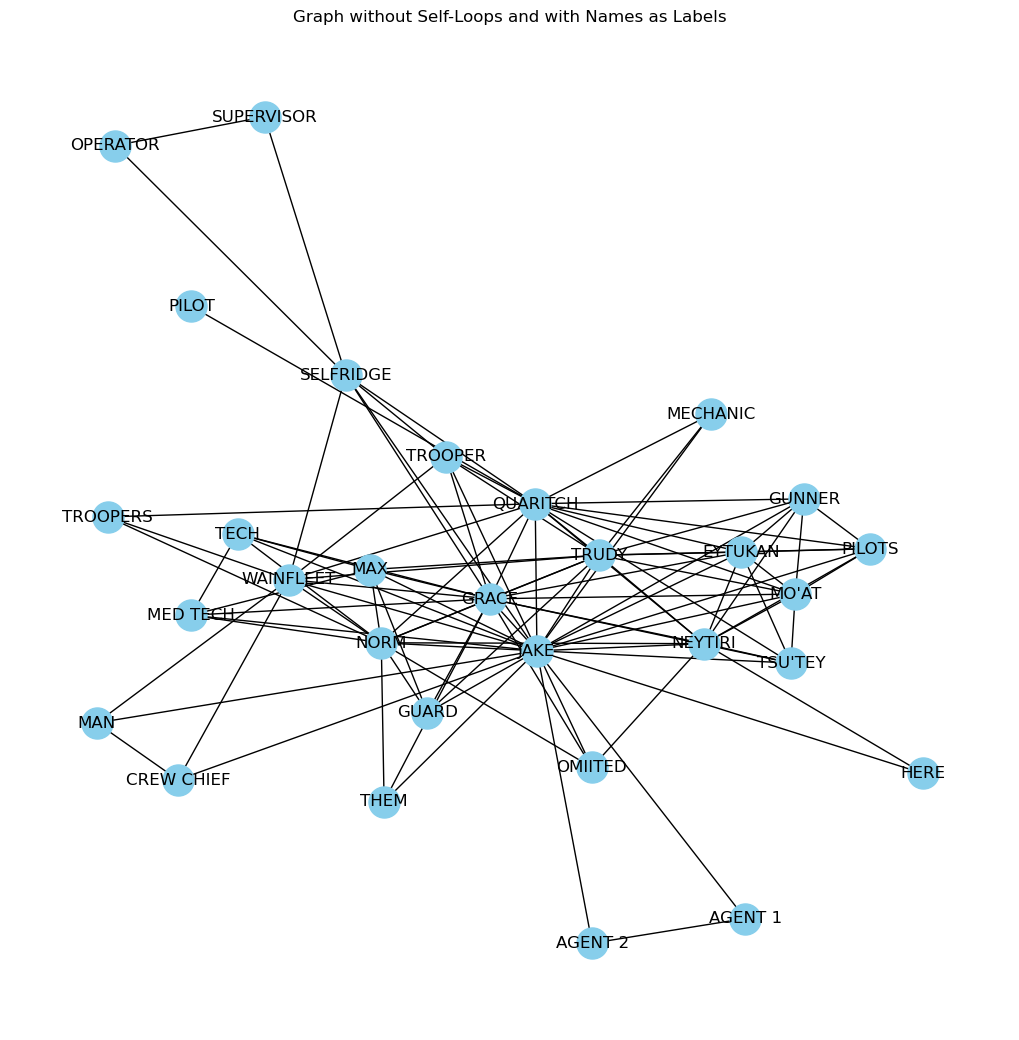

In [15]:
import time

# Check for connettivity
is_connected = nx.is_connected(G_uw)
print("Is the graph connected?", is_connected)

# Remove self-loops
G_uw.remove_edges_from(nx.selfloop_edges(G_uw))
labels = nx.get_node_attributes(G_uw, 'label')
plt.figure(figsize=(10, 10))
nx.draw(G_uw, with_labels=True, labels=labels, node_color='skyblue', node_size=500)
plt.title("Graph without Self-Loops and with Names as Labels")
plt.show()


We apply the Girvan-Newman algorithm to implement the bridge removal method. This approach generates a hierarchical structure of partitions, from which we choose the partition that maximizes modularity.

In [16]:
start_time = time.time()

# Girvan-Newman algorithm
partitions = list(nx.community.girvan_newman(G_uw))
partition_max_index = 0
max_mod_score = -1

for k in range(len(partitions)):
    modularity_score = nx.community.modularity(G_uw, partitions[k])
    if modularity_score > max_mod_score:
        max_mod_score = modularity_score
        community_max_index = k
        

partition_newman = partitions[community_max_index]
end_time = time.time()
execution_time_for_newman = end_time - start_time
num_clusters_newman = len(partition_newman)
cluster_sizes_newman = [len(cluster) for cluster in partition_newman]
print(f"The partition with the highest modularity is {partition_newman} with a value of {max_mod_score}")

The partition with the highest modularity is ({519777, 519783}, {520084, 519965}, {520197, 525709, 520592, 522131, 525975, 520859, 520100, 519861, 525884, 525633, 522179, 520010, 520779, 519631, 522064, 520156, 523228, 520927, 520314, 521836, 524282, 521727}, {520425, 524836, 524846}, {527499}) with a value of 0.08031746031746037


In [17]:
start_time = time.time()

# Modularity optimization
partition_mod = nx.community.greedy_modularity_communities(G_uw)

end_time = time.time()
execution_time_for_mod = end_time - start_time
num_clusters_mod = len(partition_mod)
cluster_sizes_mod = [len(cluster) for cluster in partition_mod]
modularity_score_mod = nx.community.modularity(G_uw, partition_mod)
print(f"The partition found by the modularity optimization algorithm is {partition_mod} with a modularity value of {modularity_score_mod}")

The partition found by the modularity optimization algorithm is [frozenset({525633, 522179, 520100, 527499, 521836, 525709, 521727, 522064, 522131, 520859, 520927}), frozenset({519777, 524836, 519783, 520425, 520010, 524846, 519631, 520084, 525975, 519965}), frozenset({520197, 520314, 520779, 523228, 520592, 519861, 524282, 520156, 525884})] with a modularity value of 0.2674829931972789


Frozensets play just the right role when representing communities, because their members are permanent and not ordered

In [18]:
start_time = time.time()

# Label propagation
communities = nx.community.asyn_lpa_communities(G_uw)
partition_lp = [frozenset(c) for c in communities]

end_time = time.time()
execution_time_for_lab = end_time - start_time
num_clusters_lab = len(partition_lp)
cluster_sizes_lab = [len(cluster) for cluster in partition_lp]
modularity_score_lab = nx.community.modularity(G_uw, partition_lp)
print(f"The partition found by the label propagation algorithm is {partition_lp} with a modularity value of {modularity_score_lab}")

The partition found by the label propagation algorithm is [frozenset({519777, 519783}), frozenset({525633, 522179, 520197, 520010, 527499, 520779, 525709, 519631, 520592, 522064, 522131, 520084, 525975, 520859, 520156, 519965, 523228, 520927, 524282, 520100, 520425, 521836, 519861, 520314, 525884, 521727}), frozenset({524836, 524846})] with a modularity value of 0.03591836734693879


In [19]:
df = pd.DataFrame({
    'Algorithm': ['Bridge Removal', 'Modularity Optimization', 'Label Propagation'],
    'Number of Clusters': [num_clusters_newman, num_clusters_mod, num_clusters_lab],
    'Clusters Size': [cluster_sizes_newman, cluster_sizes_mod, cluster_sizes_lab],
    'Computational Time': [execution_time_for_newman, execution_time_for_mod, execution_time_for_lab],
    'Modularity': [max_mod_score, modularity_score_mod, modularity_score_lab]
})

print(df)




                 Algorithm  Number of Clusters     Clusters Size  \
0           Bridge Removal                   5  [2, 2, 22, 3, 1]   
1  Modularity Optimization                   3       [11, 10, 9]   
2        Label Propagation                   3        [2, 26, 2]   

   Computational Time  Modularity  
0            0.226585    0.080317  
1            0.018043    0.267483  
2            0.006289    0.035918  


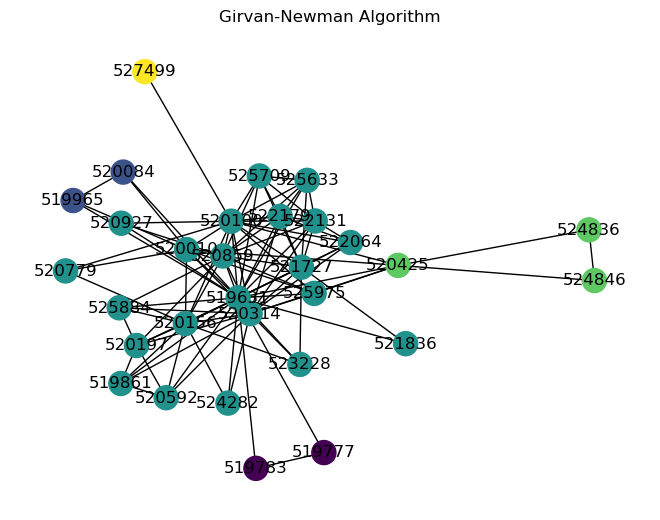

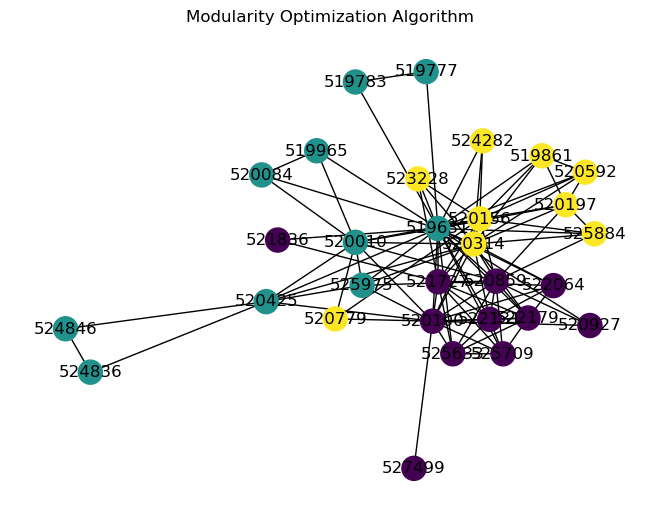

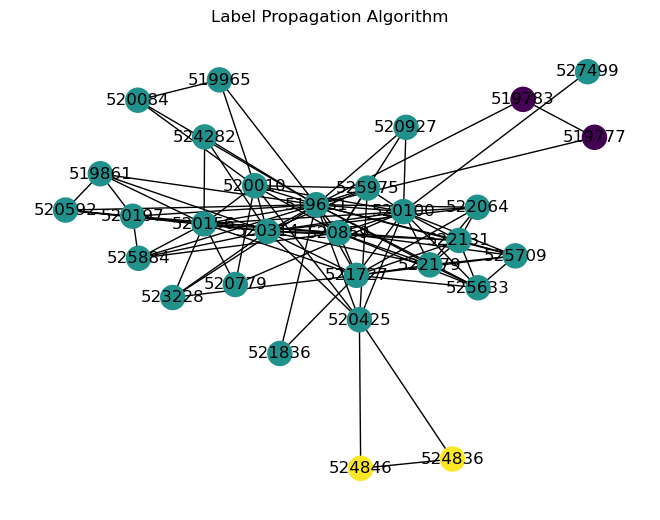

In [20]:
def plot_partition(G, partition):
    # Partition map for the modularity optimization partition
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    node_colors = [partition_map[n] for n in G.nodes]
    return node_colors

node_colors_newman = plot_partition(G_uw, partition_newman)
nx.draw(G_uw, node_color = node_colors_newman, with_labels =True)
plt.title("Girvan-Newman Algorithm")
plt.show()

node_colors_mod = plot_partition(G_uw, partition_mod)
nx.draw(G_uw, node_color = node_colors_mod, with_labels =True)
plt.title("Modularity Optimization Algorithm")
plt.show()

node_colors_lab = plot_partition(G_uw, partition_lp)
nx.draw(G_uw, node_color = node_colors_lab, with_labels =True)
plt.title("Label Propagation Algorithm")
plt.show()


All three partitions have a clear distinction between core nodes and peripheral nodes.
Each method identifies certain isolated or loosely connected nodes as belonging to smaller clusters (e.g., 519783 and 519777 form a separate group in each partition).
Regarding differences:
- Girvan-Newman results in more numerous, smaller clusters. Modularity optimization has a balanced approach, while label propagation results in fewer, larger clusters.
- Girvan-Newman produces sharper distinctions, while label propagation merges nodes into broader communities.
- Label propagation creates a dominant, large cluster around central nodes, whereas Girvan-Newman and modularity optimization provide more nuanced divisions.

The best partition is modularity optimization as it gives more balanced approach between boundary precision and community density.

# Additional Inputs
We tried to use Gephi to visualize the designated partition. We're not sure of the result and we couldn't make it to upload the file here on notebook.
In any case, a png file with the visualization is to be find attached to the project's submission.

In [21]:
from sklearn.metrics import normalized_mutual_info_score

# Convert partitions to dictionaries for easier indexing
def partition_to_labels(graph, partition):
    labels = {}
    for idx, community in enumerate(partition):
        for node in community:
            labels[node] = idx
    # Converting dictionary to a list with node labels in the original graph order
    return [labels[node] for node in graph.nodes]

# Prepare partitions as label lists
labels_gn = partition_to_labels(G, partition_newman)
labels_mod = partition_to_labels(G, partition_mod)
labels_lp = partition_to_labels(G, partition_lp)

# Compute NMI scores
nmi_gn_mod = normalized_mutual_info_score(labels_gn, labels_mod)
nmi_gn_lp = normalized_mutual_info_score(labels_gn, labels_lp)
nmi_mod_lp = normalized_mutual_info_score(labels_mod, labels_lp)

print(f"NMI between Girvan-Newman and Greedy Modularity: {nmi_gn_mod}")
print(f"NMI between Girvan-Newman and Label Propagation: {nmi_gn_lp}")
print(f"NMI between Greedy Modularity and Label Propagation: {nmi_mod_lp}")



NMI between Girvan-Newman and Greedy Modularity: 0.36012754972137145
NMI between Girvan-Newman and Label Propagation: 0.5947346171528765
NMI between Greedy Modularity and Label Propagation: 0.2130355733346095


 Higher NMI values between partitions indicate that the methods agree on the community structure, suggesting that these communities are well-defined and robust across different algorithms. Lower NMI scores imply that each method identifies distinct community structures, which could indicate variability in how communities are organized or that the network has ambiguous boundaries.
Remember that NMI values lie between 0 and 1.

---

# WEEK 7
For the seventh week we were asked to address the following tasks:
1) Create a function that computes these topological indices:
    - Common Network index
    - Resource Allocation index
2) Create a third score
3) For each one of them, identify as missing links the top 5/10 values
4) Invent a new index/score and compare results

In [22]:
from itertools import combinations

def common_neighbors_all_pairs(G_uw):
    common_neighbors_dict = {}
    
    # Loop over all unique pairs of nodes
    for node1, node2 in combinations(G_uw.nodes, 2):
        neighbors_node1 = set(G_uw.neighbors(node1))
        neighbors_node2 = set(G_uw.neighbors(node2))
        
        # Find the common neighbors
        common_neighbors = neighbors_node1.intersection(neighbors_node2)
        
        common_neighbors_dict[(node1, node2)] = len(common_neighbors)
    
    return common_neighbors_dict

# Compute the Common Neighbors index for each pair
cn_index = common_neighbors_all_pairs(G_uw)

# Convert the result into a DataFrame for easier reading
cn_index_df = pd.DataFrame(cn_index.items(), columns=['Node Pair', 'Common Neighbors Index'])


top_10_cn_index_df = cn_index_df.sort_values(by='Common Neighbors Index', ascending=False).head(10)


print("Top 10 Node Pairs with Highest Common Neighbors Index:")
print(top_10_cn_index_df)


Top 10 Node Pairs with Highest Common Neighbors Index:
            Node Pair  Common Neighbors Index
87   (519631, 520314)                      16
102  (519631, 520100)                      13
90   (519631, 520859)                      13
99   (519631, 521727)                      11
256  (520859, 520100)                      11
94   (519631, 520156)                      11
188  (520314, 520156)                      11
196  (520314, 520100)                      10
184  (520314, 520859)                      10
382  (521727, 520100)                       9


In [23]:
ra_index = list(nx.resource_allocation_index(G_uw))

ra_index_df = pd.DataFrame(ra_index, columns=['Node1', 'Node2', 'RA Index'])

top_10_ra_index_df = ra_index_df.sort_values(by='RA Index', ascending=False).head(10)

print("Top 10 Node Pairs with Highest Resource Allocation Index:")
print(top_10_ra_index_df)

Top 10 Node Pairs with Highest Resource Allocation Index:
      Node1   Node2  RA Index
256  525633  520314  0.479484
68   525709  520314  0.479484
153  520859  522064  0.466879
149  520859  520425  0.427990
59   525709  522064  0.408056
255  525633  522064  0.408056
135  525975  520156  0.332752
89   520592  525884  0.318604
154  520859  519861  0.318604
232  519861  525884  0.318604


In [24]:
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler


# Function which computes common neighbors for all unique node pairs
def common_neighbors_all_pairs(G_uw):
    common_neighbors_dict = {}
    for node1, node2 in combinations(G_uw.nodes, 2):
        neighbors_node1 = set(G_uw.neighbors(node1))
        neighbors_node2 = set(G_uw.neighbors(node2))
        common_neighbors = neighbors_node1.intersection(neighbors_node2)
        common_neighbors_dict[(node1, node2)] = len(common_neighbors)
    return common_neighbors_dict


cn_index = common_neighbors_all_pairs(G_uw)
cn_index_df = pd.DataFrame(cn_index.items(), columns=['Node Pair', 'Common Neighbors Index'])


ra_index = list(nx.resource_allocation_index(G_uw))
ra_index_df = pd.DataFrame(ra_index, columns=['Node1', 'Node2', 'RA Index'])
ra_index_df['Node Pair'] = list(zip(ra_index_df['Node1'], ra_index_df['Node2']))
ra_index_df = ra_index_df[['Node Pair', 'RA Index']]


indices_df = pd.merge(cn_index_df, ra_index_df, on='Node Pair')

# Rescale both indices between 0 and 1
scaler = MinMaxScaler()
indices_df[['Common Neighbors Index', 'RA Index']] = scaler.fit_transform(indices_df[['Common Neighbors Index', 'RA Index']])

# Create the third score by summing the rescaled indices
indices_df['Combined Score'] = indices_df['Common Neighbors Index'] + indices_df['RA Index']

# Identify top 5 node pairs for each score
top_5_cn = indices_df.nlargest(5, 'Common Neighbors Index')
top_5_ra = indices_df.nlargest(5, 'RA Index')
top_5_combined = indices_df.nlargest(5, 'Combined Score')


top_5_cn, top_5_ra, top_5_combined


(           Node Pair  Common Neighbors Index  RA Index  Combined Score
 94  (520859, 522064)                1.000000  1.000000        2.000000
 47  (520010, 521727)                0.833333  0.663288        1.496621
 53  (522131, 520156)                0.833333  0.677018        1.510351
 71  (525633, 522064)                0.833333  0.874007        1.707340
 85  (525709, 522064)                0.833333  0.874007        1.707340,
            Node Pair  Common Neighbors Index  RA Index  Combined Score
 94  (520859, 522064)                1.000000  1.000000        2.000000
 92  (520859, 520425)                0.833333  0.916705        1.750038
 71  (525633, 522064)                0.833333  0.874007        1.707340
 85  (525709, 522064)                0.833333  0.874007        1.707340
 86  (520859, 519861)                0.666667  0.682412        1.349078,
            Node Pair  Common Neighbors Index  RA Index  Combined Score
 94  (520859, 522064)                1.000000  1.000000       

Pair numbers  `94, 71` and `85`consistently appear across all three scores, suggesting they are strong candidates for potential links. Establishing connections between these nodes could enhance network connectivity and possibly influence the network structure by bridging clusters or increasing robustness.

---

#### Enhanced Common Neighbor Index (ECNI)
This index created by us, combines common neighbors with a *proximity factor* based on the distance of the common neighbors from the nodes in question.
In essence, the ECNI is a tool that analyzes pairwise connectivity in complex networks, such as social or character interaction graphs, with a focus on quality over quantity of connections

In [25]:
from itertools import combinations

def enhanced_common_neighbor_index(G_uw):
    ecni_dict = {}

    # Iterate on unique pairs of nodes
    for u, v in combinations(G_uw.nodes, 2):
        common_neighbors = set(G_uw.neighbors(u)).intersection(set(G_uw.neighbors(v)))
        
        ecni_score = 0
        for w in common_neighbors:
            # Calculate distances between the node pair and each common neighbor
            distance_u_w = nx.shortest_path_length(G_uw, source=u, target=w)
            distance_v_w = nx.shortest_path_length(G_uw, source=v, target=w)
            ecni_score += 1 / (distance_u_w + distance_v_w)
        
        # Dictionary with node pairs as keys
        ecni_dict[(u, v)] = ecni_score

    ecni_df = pd.DataFrame(ecni_dict.items(), columns=['Node Pair', 'ECNI Score'])
    return ecni_df


ecni_df = enhanced_common_neighbor_index(G_uw)

# Display the top 10 pairs by ECNI Score
top_10_ecni = ecni_df.sort_values(by='ECNI Score', ascending=False).head(10)
print("Top 10 Node Pairs with Highest Enhanced Common Neighbor Index (ECNI):")
print(top_10_ecni)


Top 10 Node Pairs with Highest Enhanced Common Neighbor Index (ECNI):
            Node Pair  ECNI Score
87   (519631, 520314)         8.0
102  (519631, 520100)         6.5
90   (519631, 520859)         6.5
99   (519631, 521727)         5.5
256  (520859, 520100)         5.5
94   (519631, 520156)         5.5
188  (520314, 520156)         5.5
196  (520314, 520100)         5.0
184  (520314, 520859)         5.0
382  (521727, 520100)         4.5


The pair `519631, 520314`, embobied by characters Jake and Grace, reflects a very strong connection in the network, possibly due to frequent or impactful interactions. In the movie, these two characters are closely aligen, both working together on the Avatar program and sharing critical moments in the story.

---

# WEEK 9
For the ninth week we were asked to address the following tasks:
1) Choose one between ER, UA, PA accordingly to graph's characteristics
2) Choose wisely the parameter to obtain the correct average degree and compare another characteristic

We choose to perform Uniform Attachment on pur graph beacuse of the following reasons:
- Nodes in the Avatar graph represent characters, and edges signify shared scene appearances. These connections likely stem from pre-defined groupings (e.g., scenes), not popularity-driven mechanisms
- Uniform Attachment is computationally simpler than PA but allows for modifications (e.g., incorporating weights, clustering biases) to closely mimic real-world interactions
- UA can integrate weights effectively by assigning probabilities proportional to interaction contexts

In [26]:
import random

N = 30

def create_ua_plot(vertex_num: int,edge_num: int, plot: str, t=0):
    
    m=edge_num
    l=vertex_num    
    G = nx.empty_graph(m) # initialize at the minimal number of nodes for the model to bewell defined without multiedges
    
    c = (m-1) # last index of a node in the network at the current time 0,...,m-1
    
    for i in range(l):
        c=c+1
        liste=random.sample(range(c), m) # pick m element between 0 and m-1

        for n in liste:
            G.add_edge(c,n,length=1)

        if plot=='all':
            nx.draw(G, node_size=200, nodelist=range(c+1), with_labels=True)
            plt.show()
            time.sleep(t)
    if plot=='last':
        nx.draw(G, node_size=200, nodelist=range(c+1), with_labels=True)
        plt.show()
        
    return G

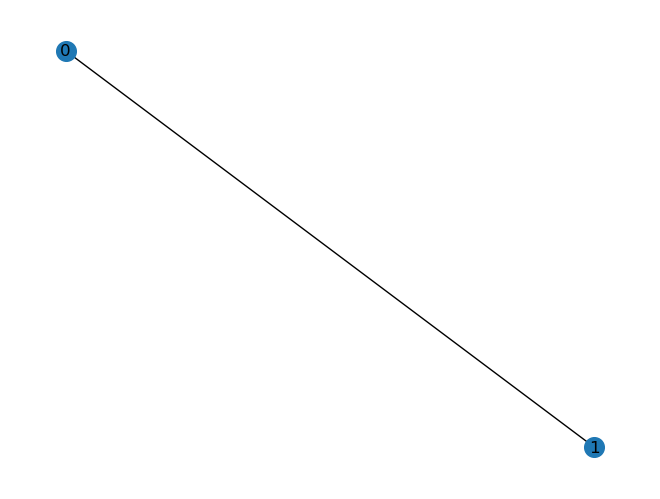

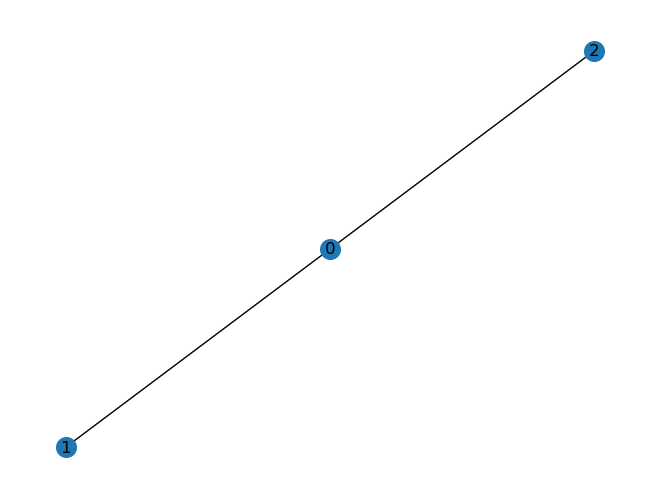

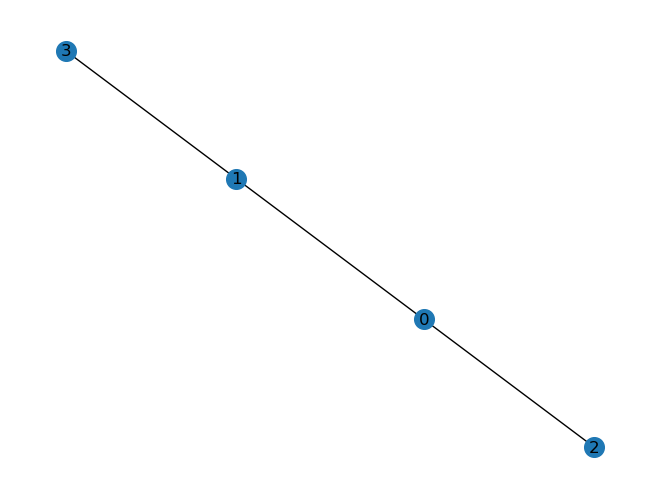

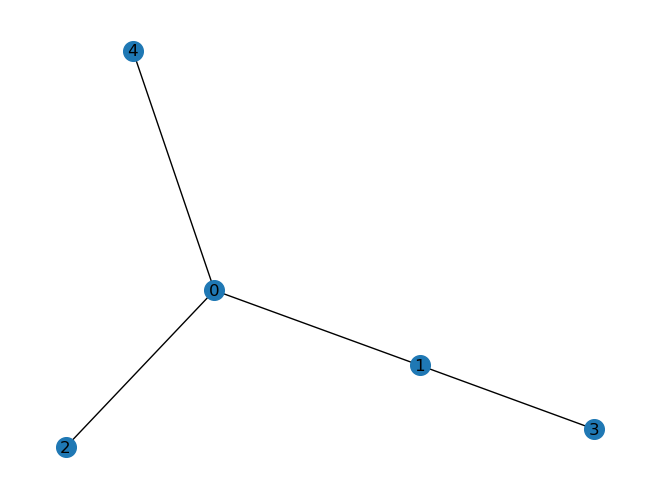

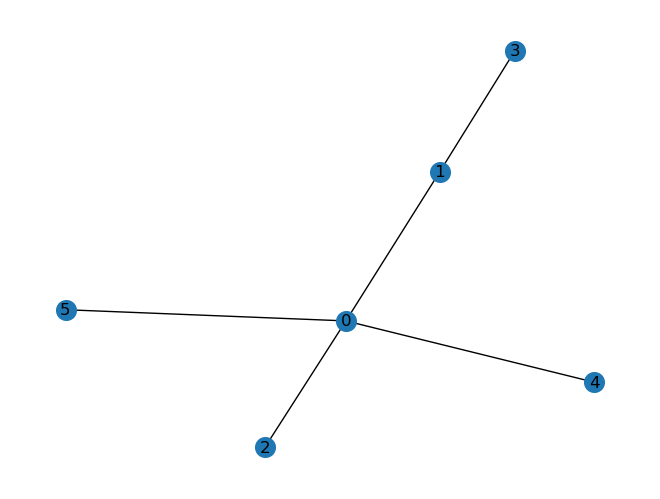

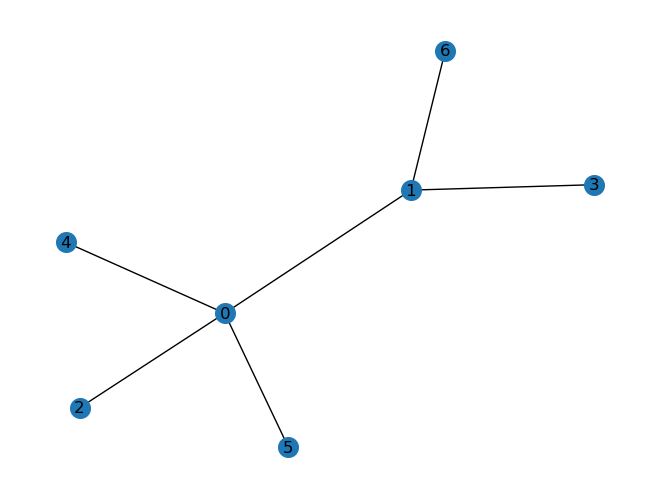

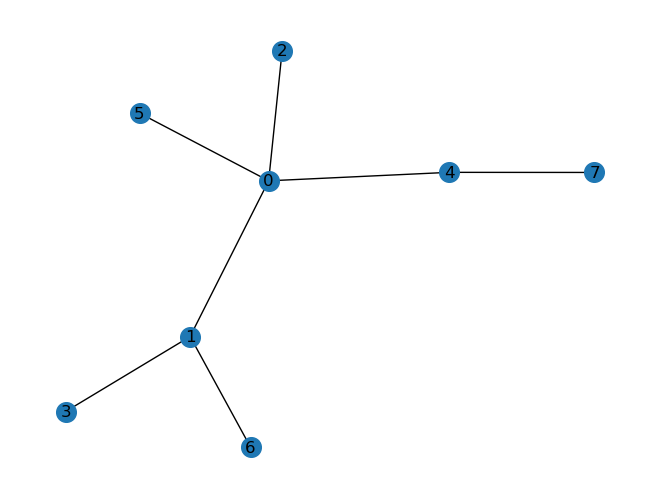

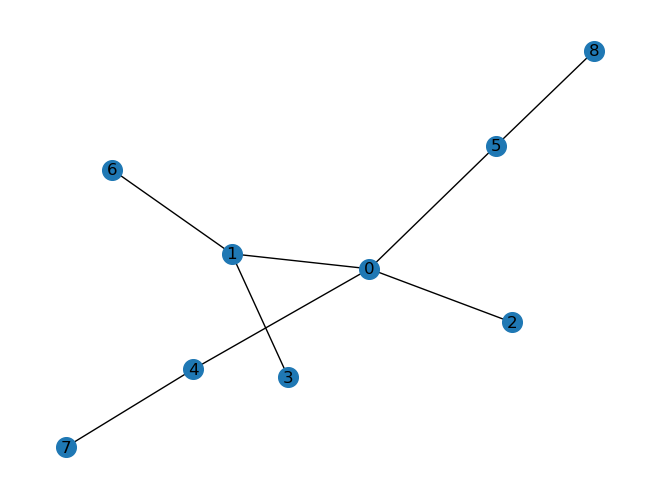

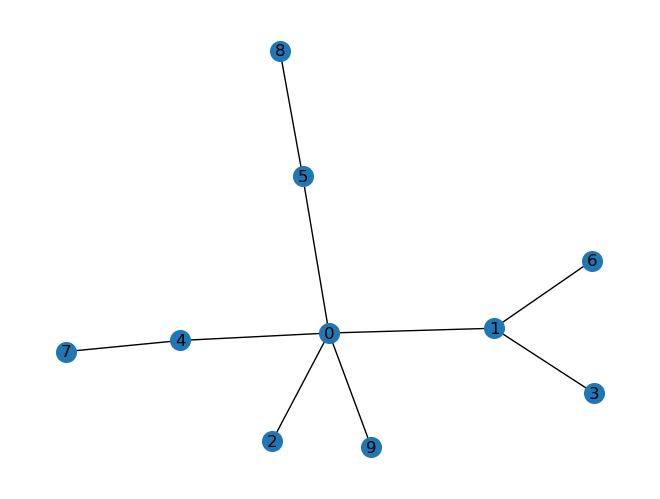

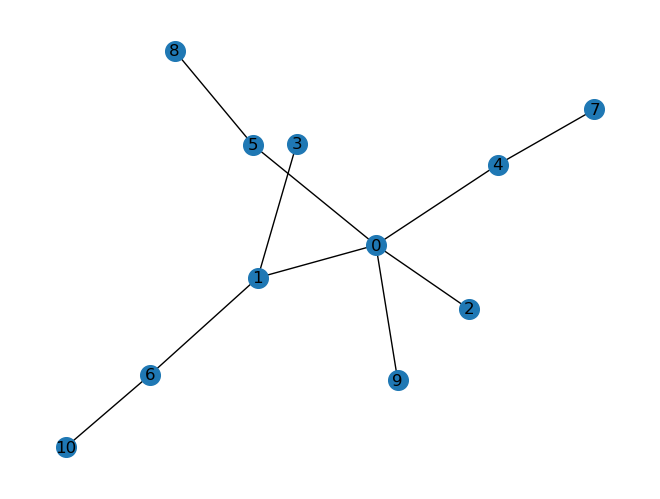

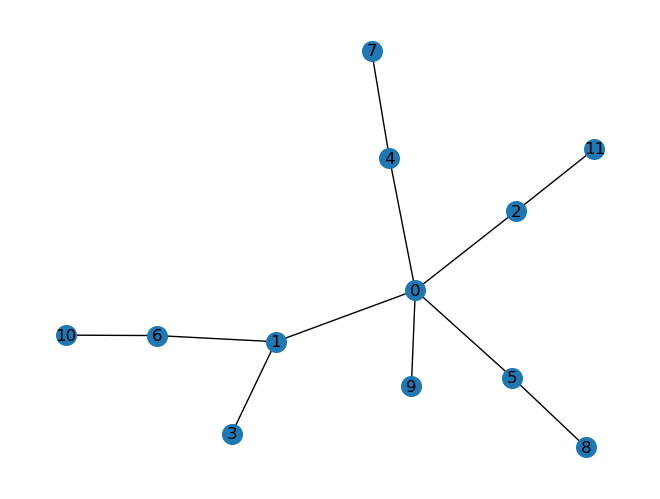

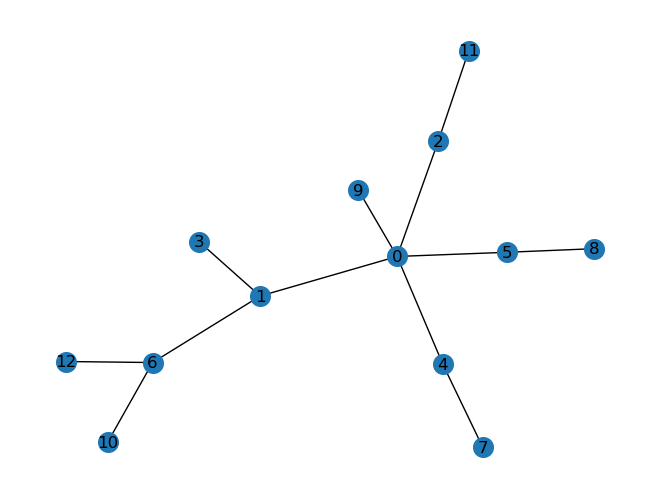

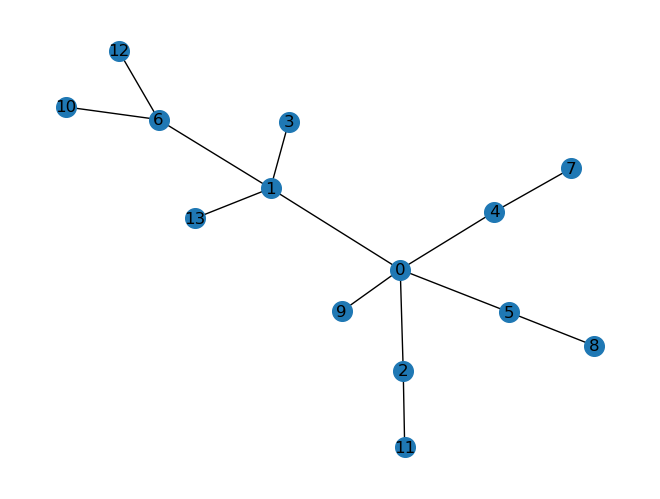

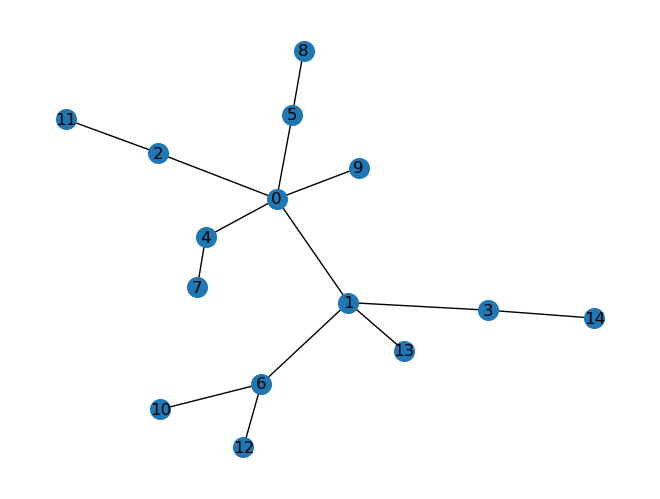

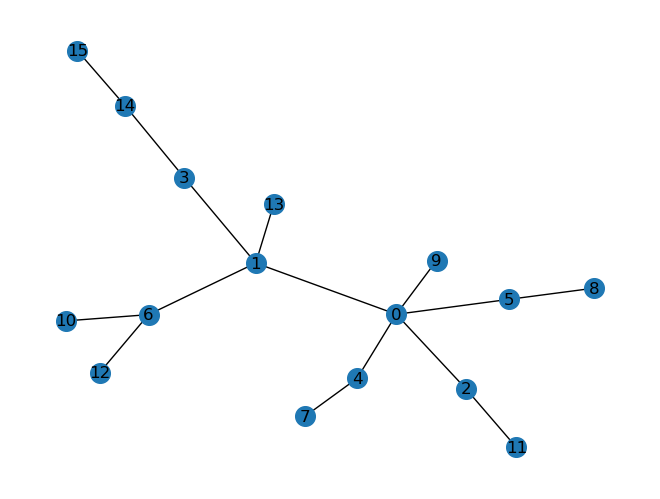

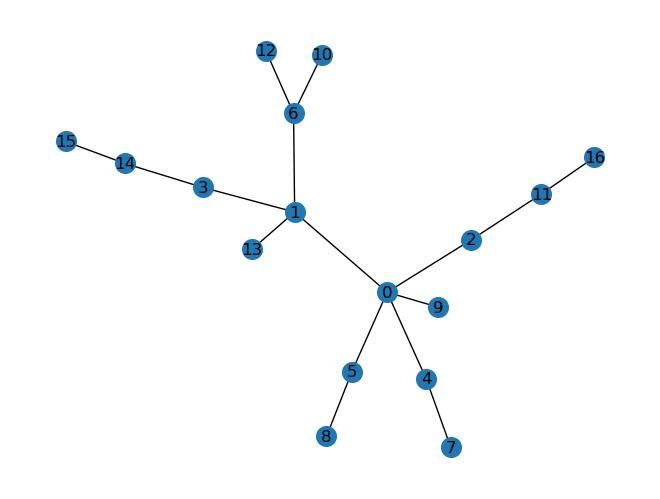

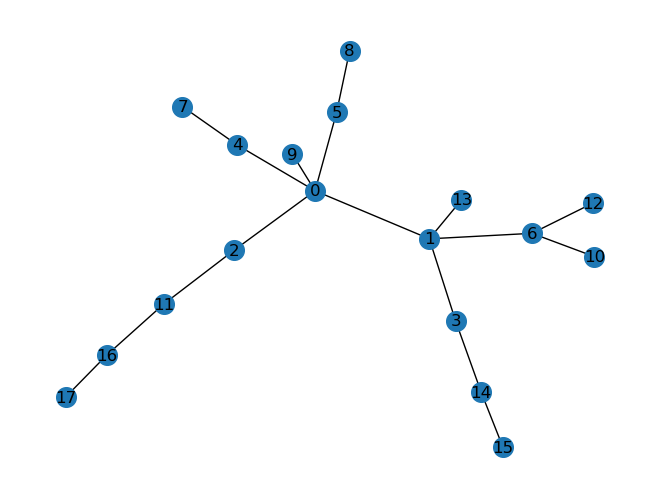

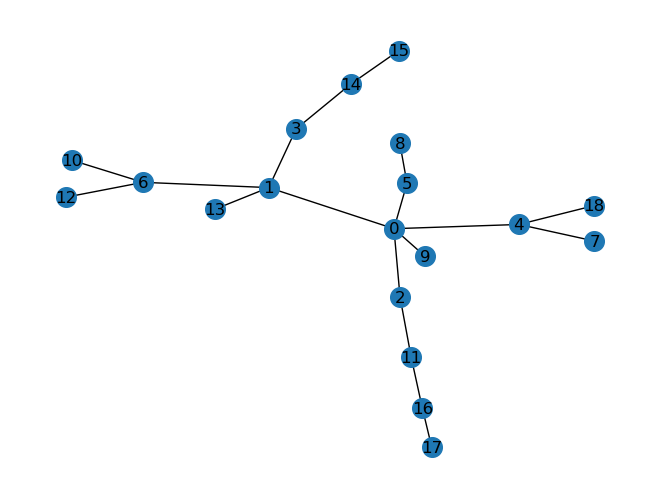

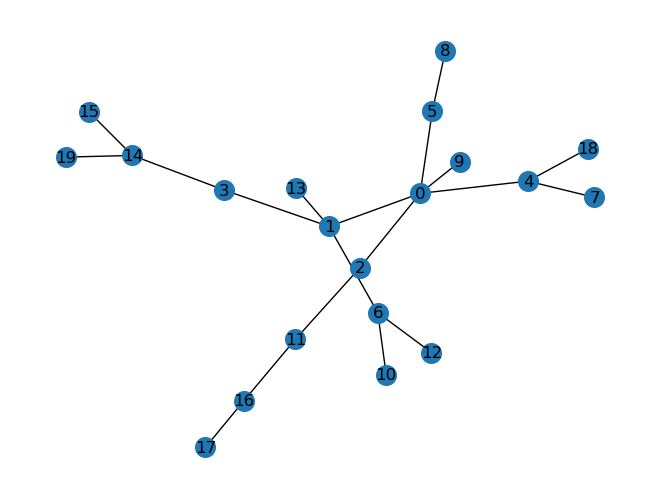

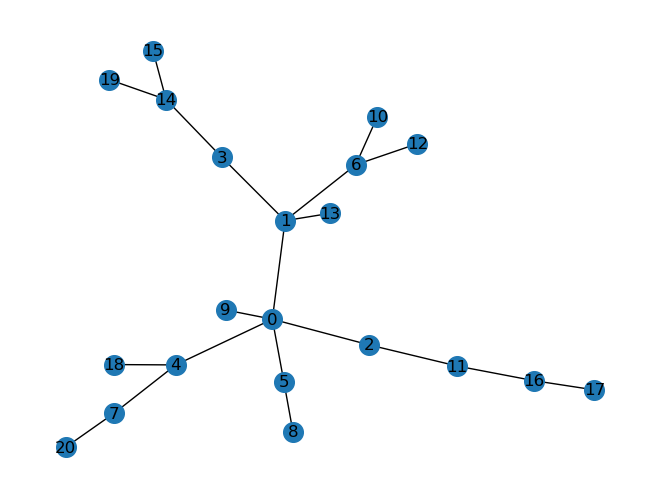

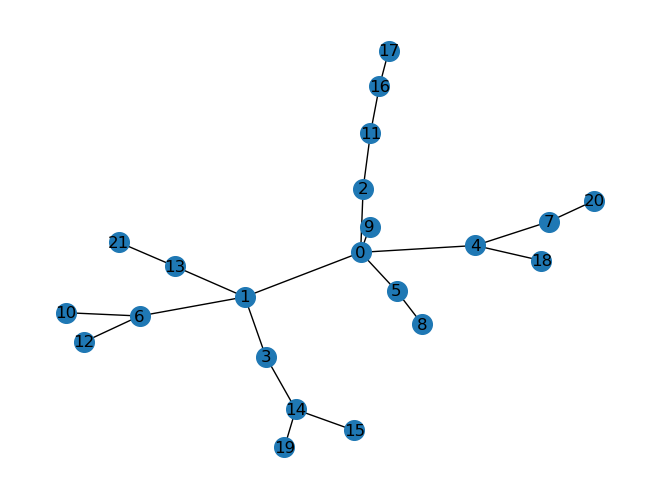

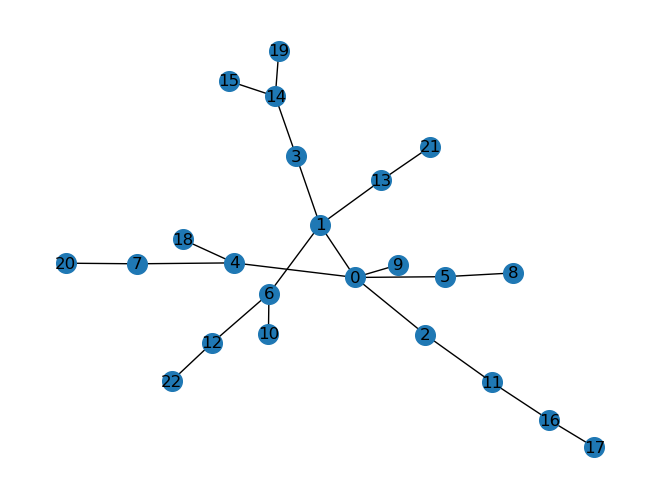

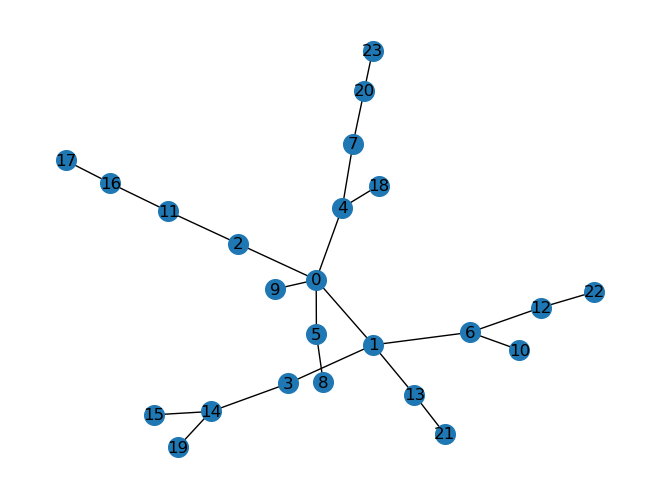

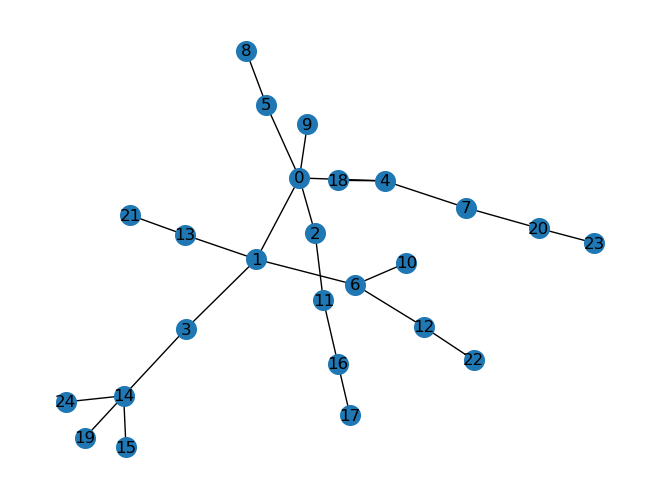

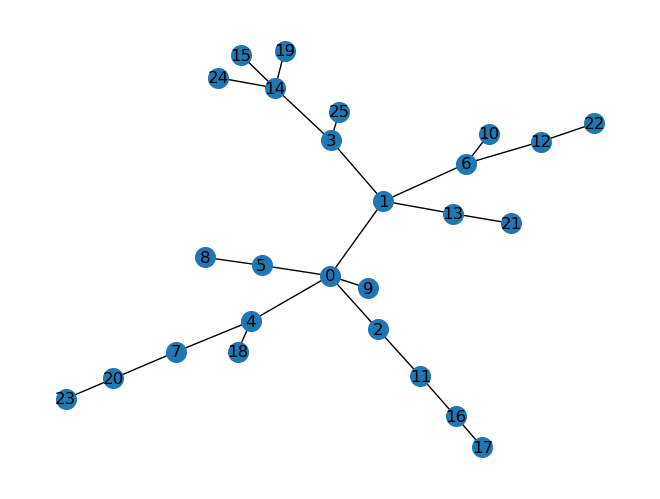

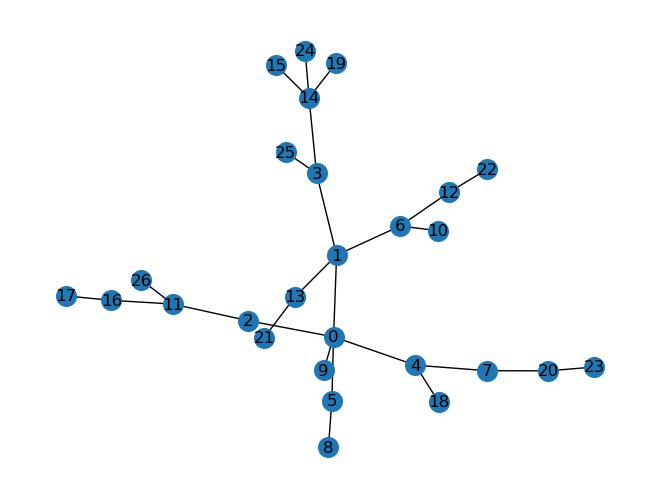

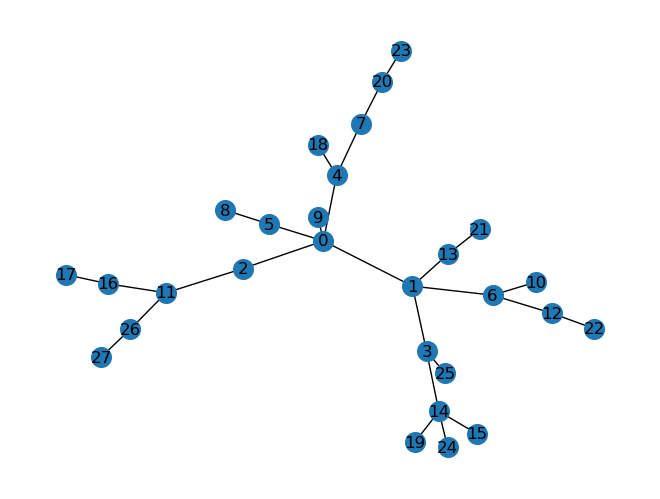

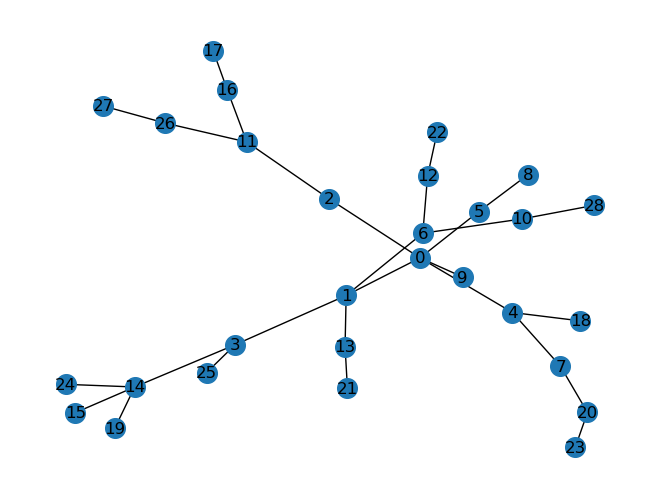

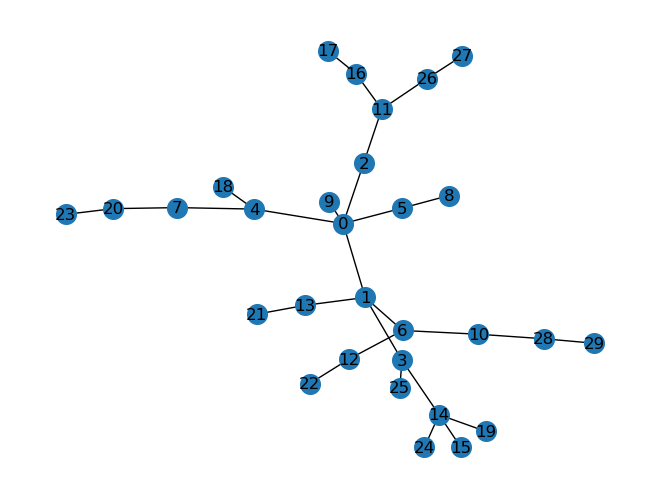

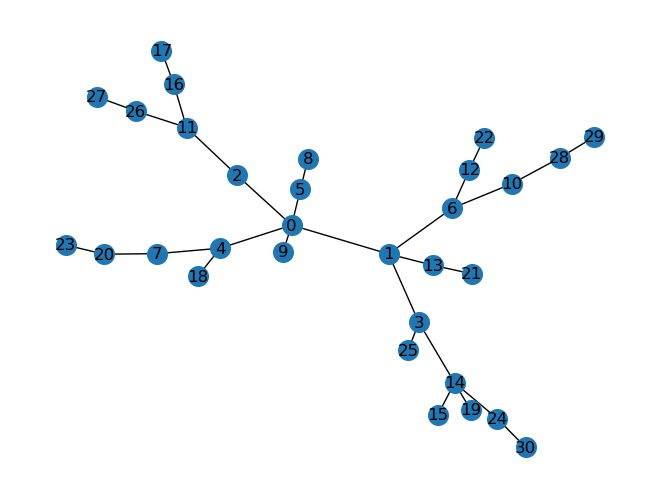

In [27]:
create_ua_plot(N,1,'all',0)

### Average Degree 

In [28]:
total_deg= sum(span for n, span in G.degree())
k_Avatar=total_deg/(G.number_of_nodes())
print('The average degree is:')
print(k_Avatar)

The average degree is:
7.0


In [29]:
m_opt = int(k_Avatar/2)
print(m_opt)

3


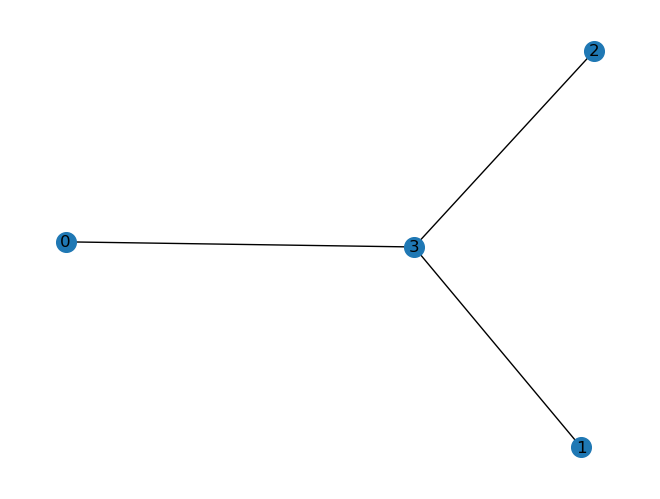

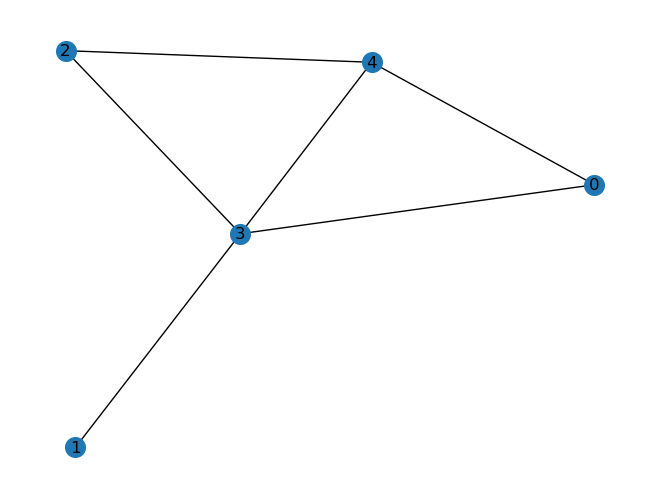

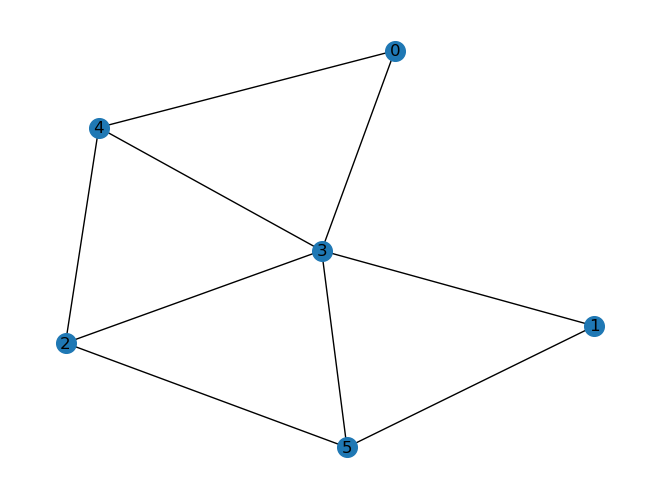

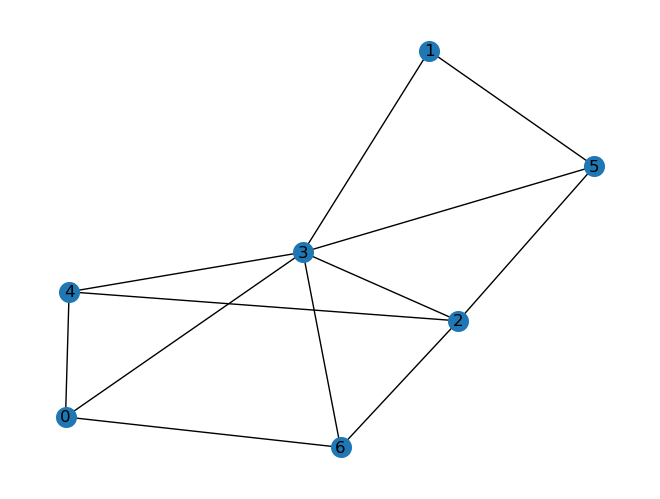

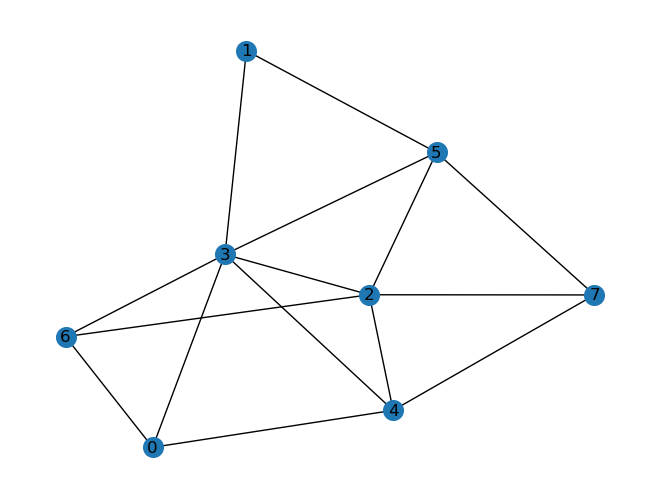

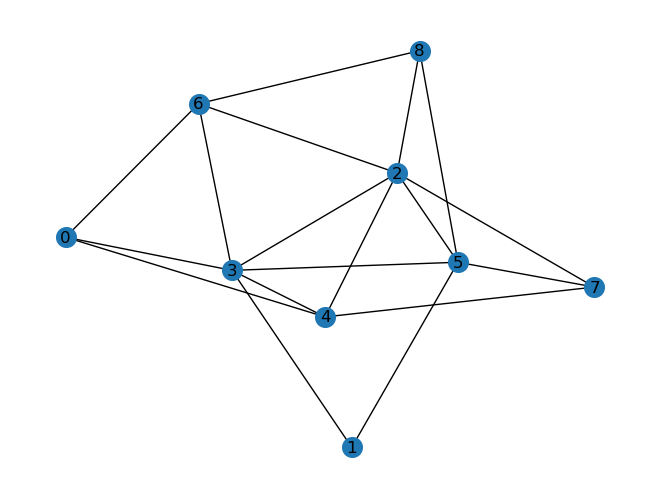

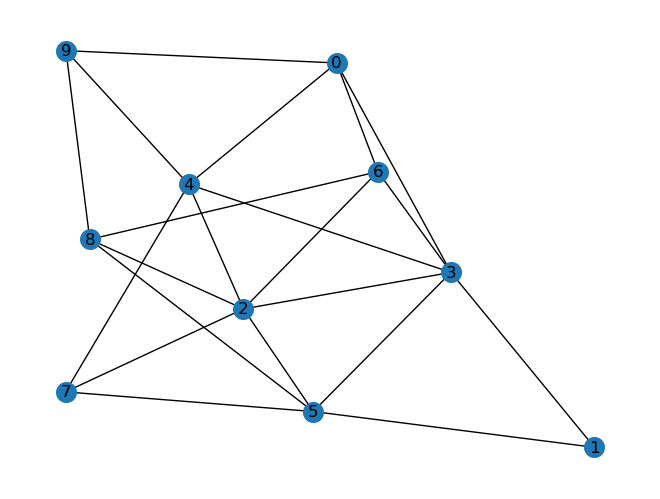

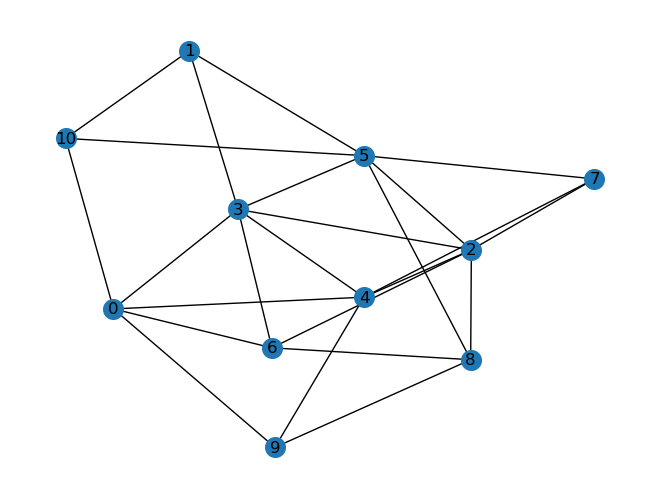

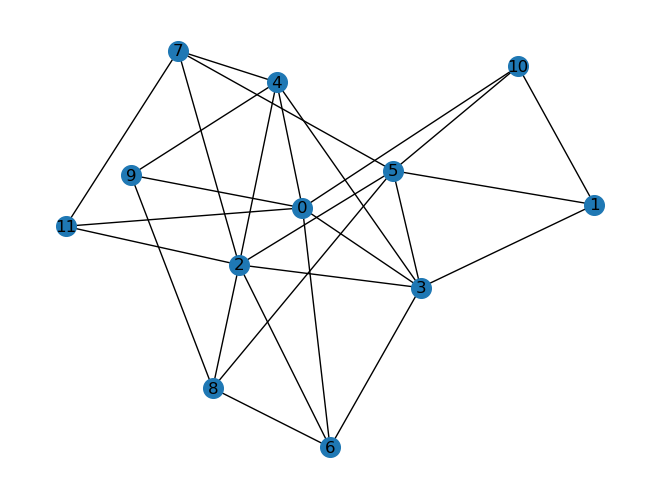

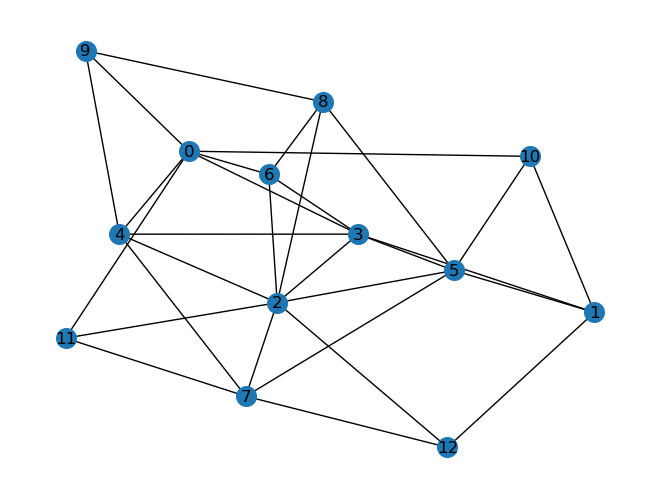

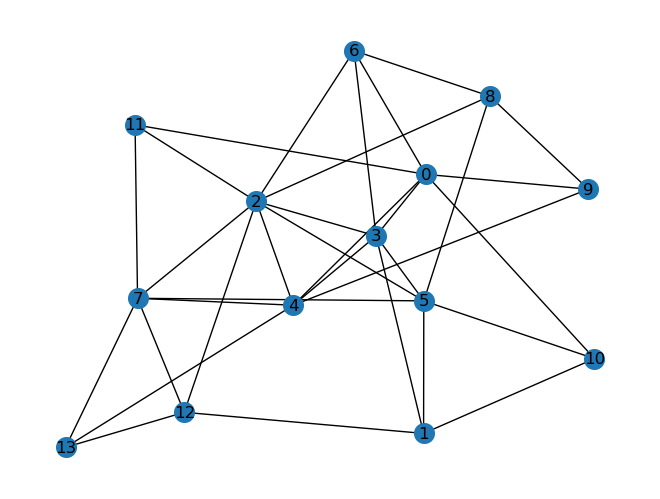

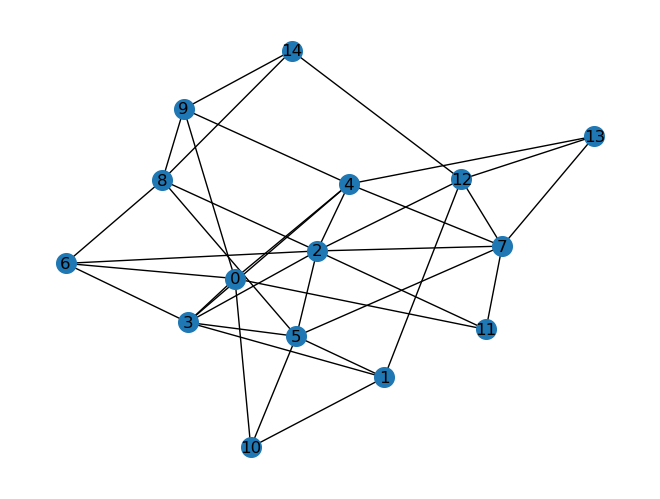

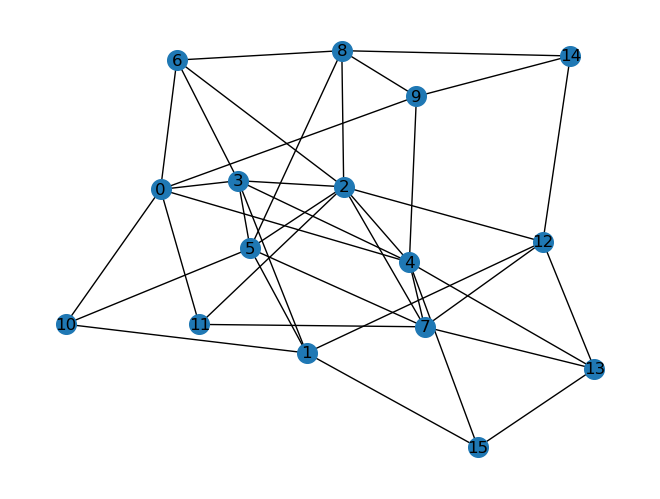

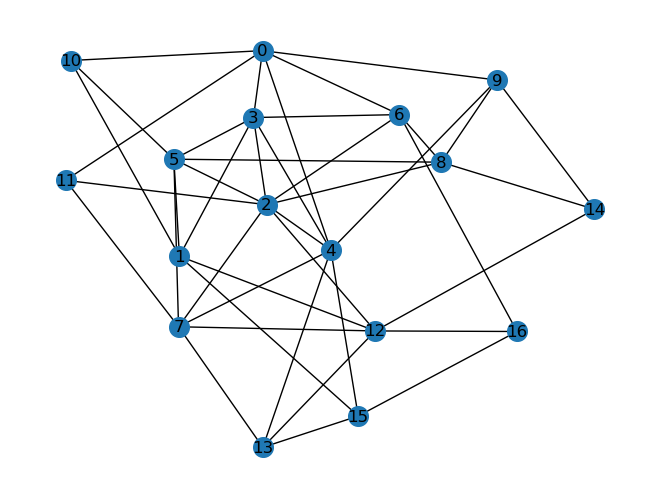

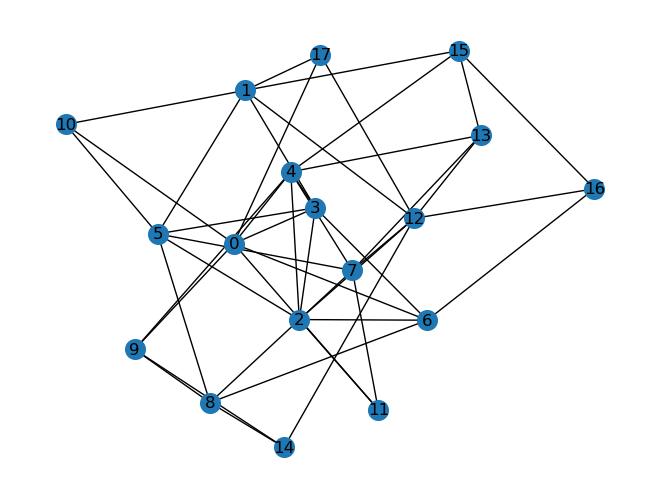

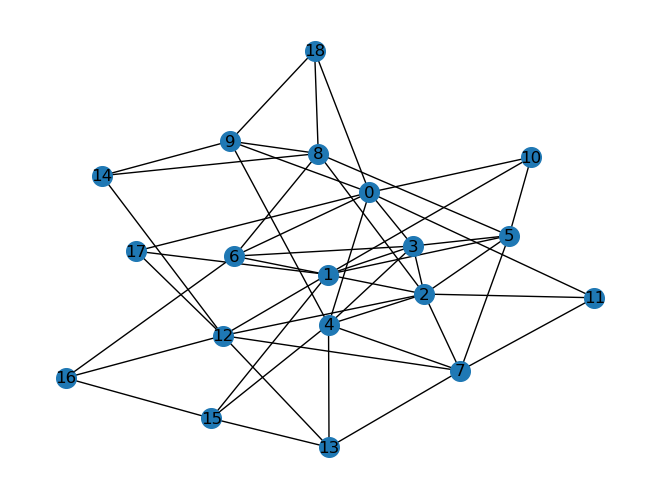

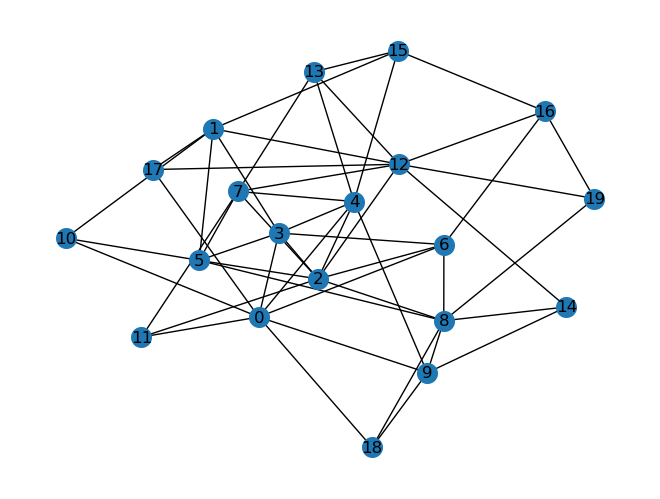

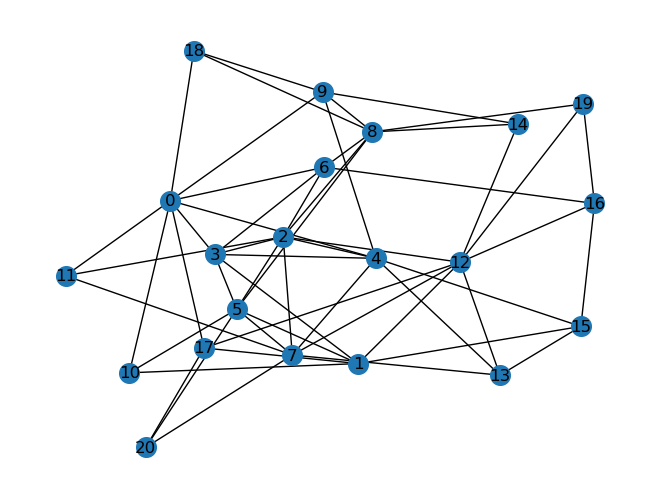

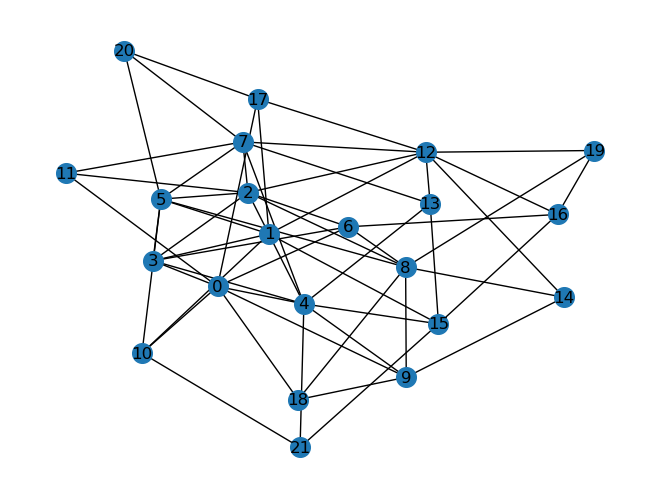

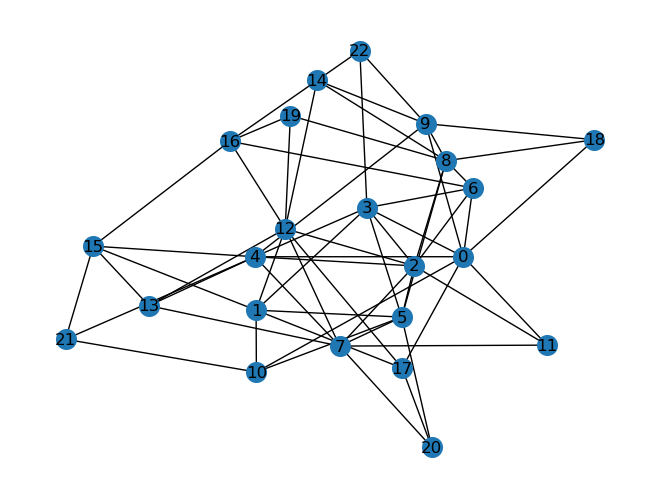

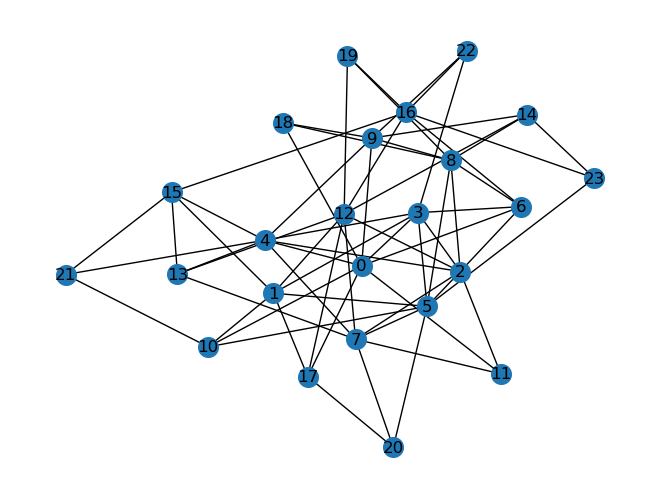

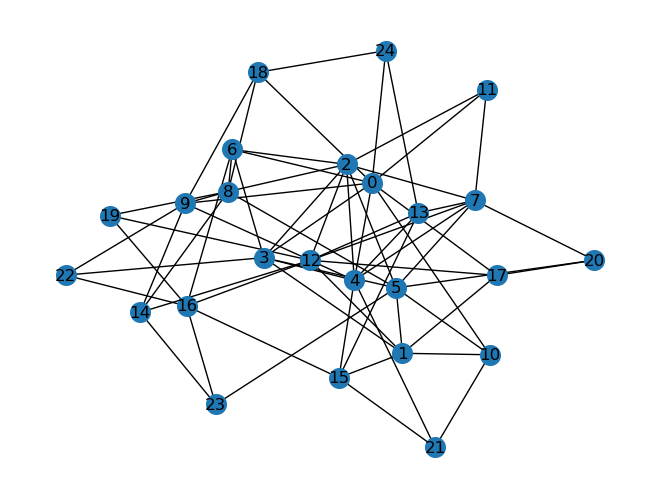

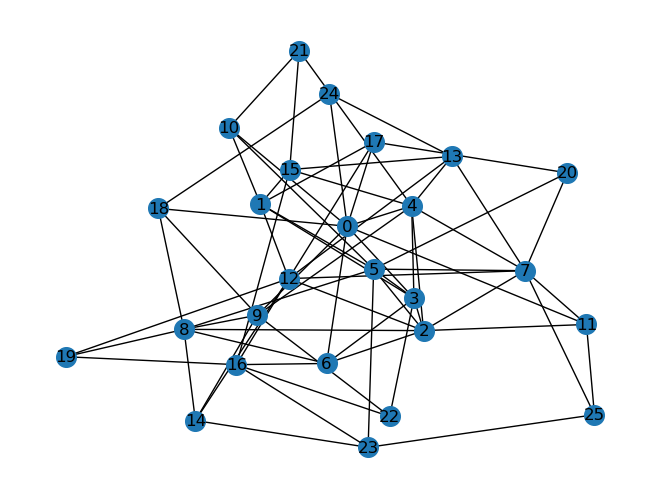

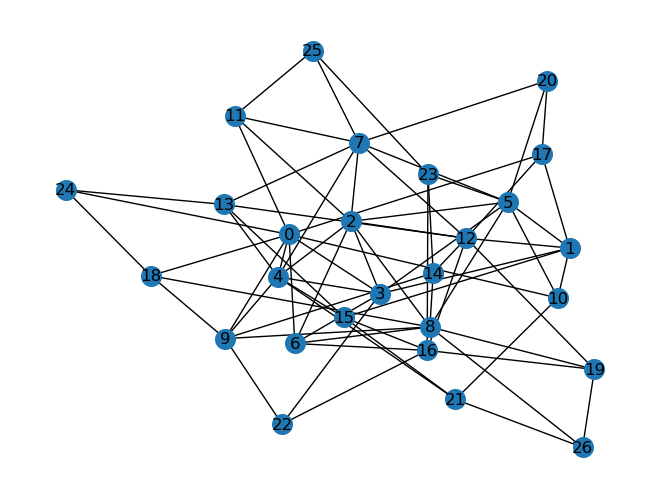

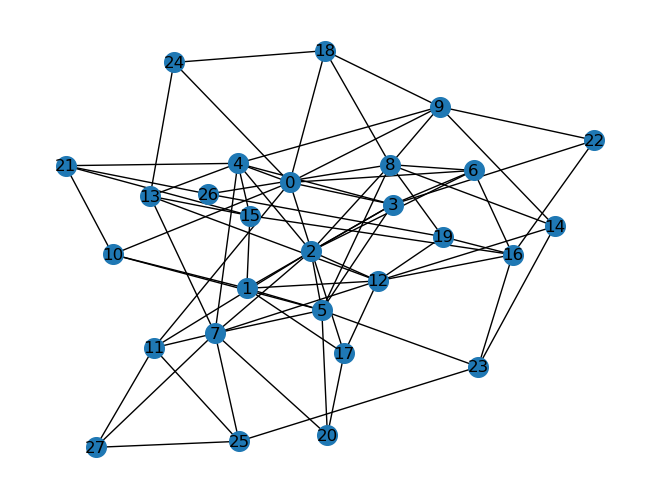

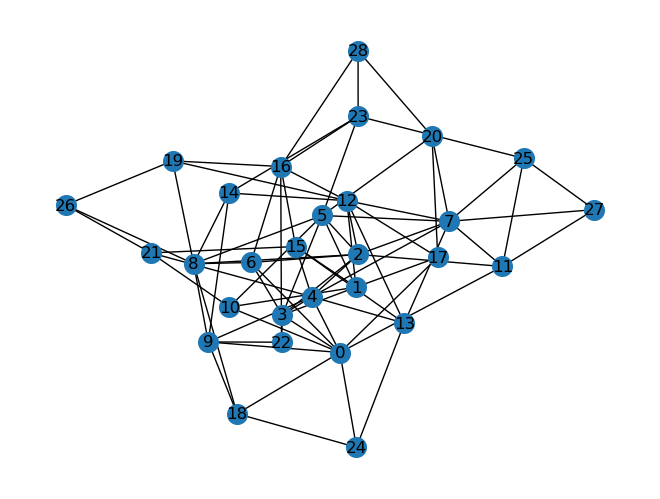

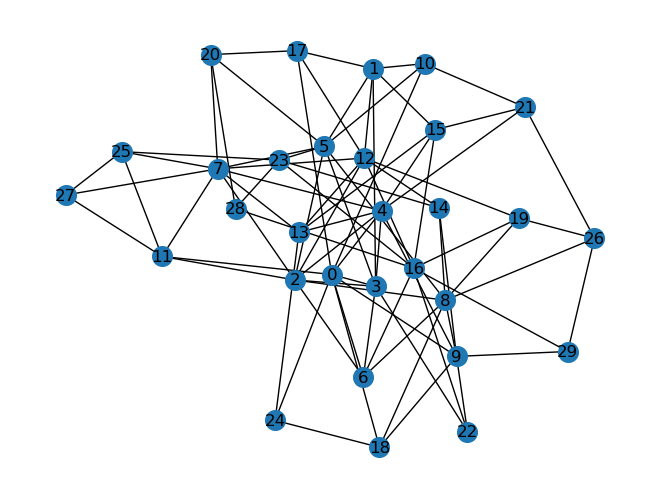

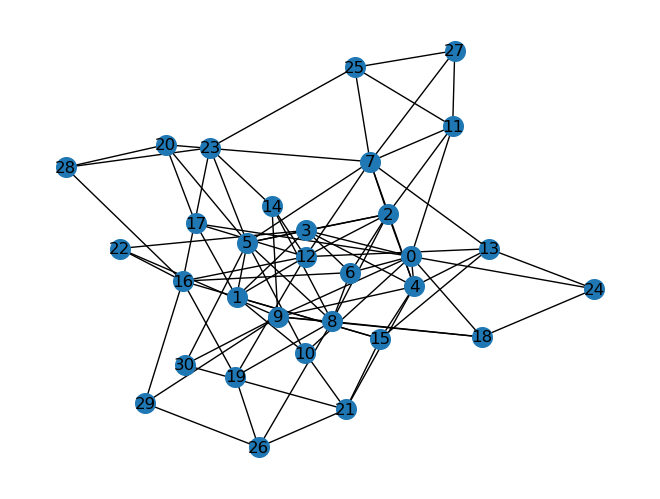

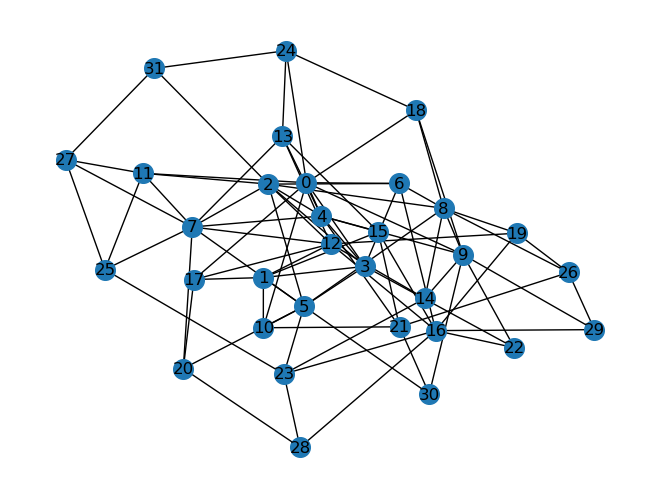

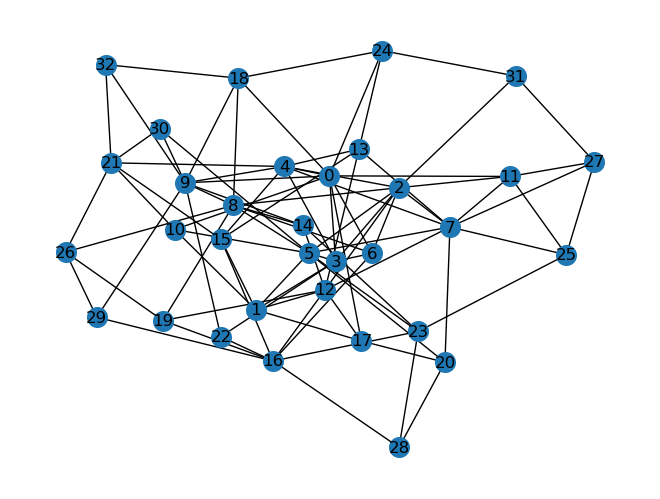

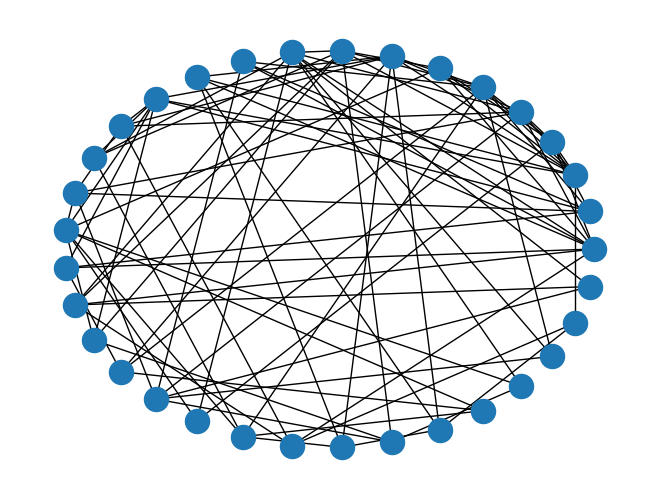

In [30]:
G2 = create_ua_plot(N, m_opt, 'all', 0)
nx.draw_circular(G2)

### Comparison

In [31]:
nx.is_connected(G)

True

In [32]:
largest_cc_SNA = max(nx.connected_components(G), key=len)
G_Avatar_main=G.subgraph(largest_cc_SNA)
diameter_G_Avatar = nx.diameter(G_Avatar_main)

largest_cc_2 = max(nx.connected_components(G2), key=len)
G2_main=G2.subgraph(largest_cc_2)
diameter_G2 = nx.diameter(G2_main)

print(f"Diameter of G_Avatar_main: {diameter_G_Avatar}")
print(f"Diameter of G2_main: {diameter_G2}")

Diameter of G_Avatar_main: 3
Diameter of G2_main: 4


The slightly larger diameter reflects a more spread-out structure. While still connected, it suggests that nodes are, on average, farther apart compared to the original graph.
This is consistent with the nature of Uniform Attachment, where edges are formed randomly, leading to less clustering and slightly longer shortest paths.
Differences between these two graphs emerge because of a disparity in clusters and edge formation.

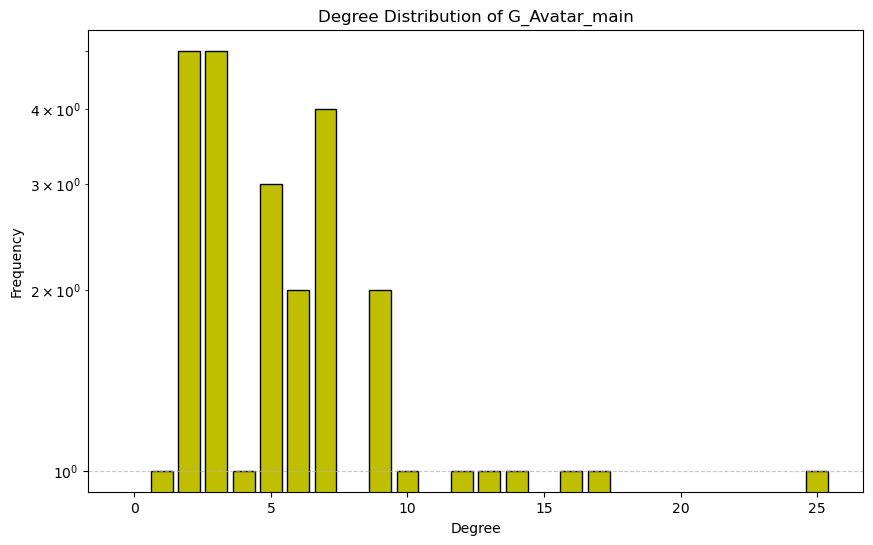

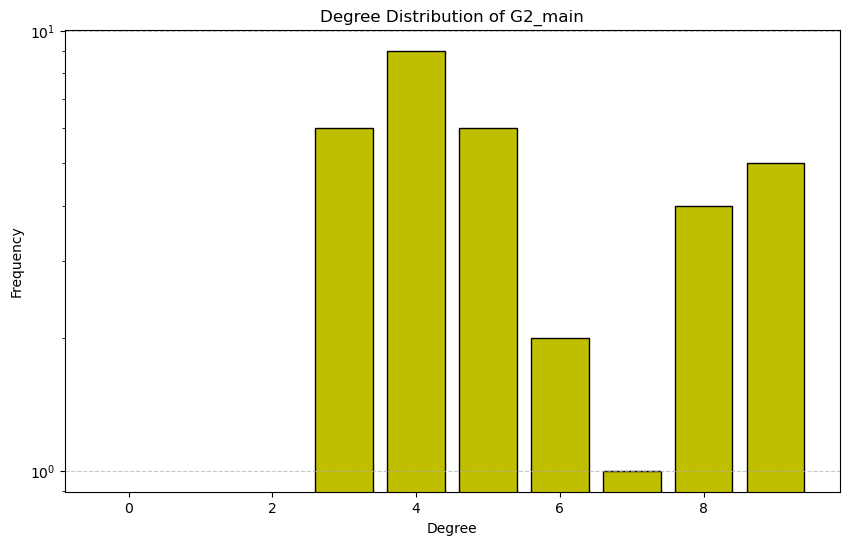

In [33]:
def plot_degree_distribution(graph, title="Degree Distribution"):
    # Compute degree sequence
    degree_sequence = [d for n, d in graph.degree()]
    
    # Count frequencies of each degree
    degree_counts = np.bincount(degree_sequence)
    degrees = np.arange(len(degree_counts))
    
    # Plot degree distribution
    plt.figure(figsize=(10, 6))
    plt.bar(degrees, degree_counts, width=0.8, color='y', edgecolor='black', align='center')
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.yscale("log") 
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_degree_distribution(G_Avatar_main, title="Degree Distribution of G_Avatar_main")
plot_degree_distribution(G2_main, title="Degree Distribution of G2_main")


The degree distribution after Uniform Attachment is narrower, with degrees mostly clustering around smaller values (2-10). This reflects the uniform nature of edge attachment, where new nodes are added with edges distributed evenly, avoiding the creation of prominent hubs.

About the original graph we can say that the presence of key characters (hubs) relates to the wide degree distribution; with some nodes having very high degrees, it suggests the existence of central characters who interact frequently with others.
Indeed, characters like Jake Sully, Neytiri, or Colonel Quaritch serve as hubs because they are pivotal to the storyline, appearing in scenes with many other characters.

---

# WEEK 10
For the tenth week we were asked to address the following tasks:
1) Accordingly to the graph, choose among one of these alternative models
2) Investigate different outbreak scenarios


In [34]:
def independent_cascade_model(graph, seed_nodes, p=0.01, steps=10):
    active_nodes = set(seed_nodes)
    all_active_nodes = {1: set(active_nodes)}
    for step in range(2, steps + 1):
        new_active_nodes = set()
        for node in active_nodes:
            neighbors = list(graph.neighbors(node))
            for neighbor in neighbors:
                if neighbor not in active_nodes and neighbor not in new_active_nodes:
                    if random.random() < p:
                        new_active_nodes.add(neighbor)
        if not new_active_nodes:
            break  
        active_nodes.update(new_active_nodes)
        all_active_nodes[step] = new_active_nodes
    
    return all_active_nodes

# Parameters for the simulation
adjusted_p = 0.2  
adjusted_seed_nodes = [519777, 520100, 522131] 
adjusted_steps = 10  

# Run the Independent Cascade Model
diffusion_result = independent_cascade_model(
    G, adjusted_seed_nodes, p=adjusted_p, steps=adjusted_steps
)

print("Diffusion process:")
for step, nodes in diffusion_result.items():
    print(f"Step {step}: {len(nodes)} nodes activated")
    print(f"Activated nodes: {nodes}")

Diffusion process:
Step 1: 3 nodes activated
Activated nodes: {519777, 522131, 520100}
Step 2: 9 nodes activated
Activated nodes: {525633, 519783, 520425, 525709, 519631, 522064, 525975, 520314, 521727}
Step 3: 7 nodes activated
Activated nodes: {522179, 520010, 527499, 519861, 520859, 519965, 520927}
Step 4: 5 nodes activated
Activated nodes: {520197, 523228, 521836, 524282, 520156}
Step 5: 3 nodes activated
Activated nodes: {520592, 520084, 525884}


In [35]:
def run_scenarios(graph, scenarios):
    results = {}
    for i, scenario in enumerate(scenarios):
        seed_nodes = scenario['seed_nodes']
        p = scenario['p']
        steps = scenario['steps']
        
        # Run the model
        diffusion_result = independent_cascade_model(graph, seed_nodes, p, steps)
        
        # Calculate total outbreak size
        total_activated = sum(len(nodes) for nodes in diffusion_result.values())
        
        # Store results
        results[f"Scenario {i+1}"] = {
            'seed_nodes': seed_nodes,
            'p': p,
            'steps': steps,
            'outbreak_size': total_activated,
            'detail': diffusion_result
        }
    return results

# Define scenarios
scenarios = [
    {'seed_nodes': [519777], 'p': 0.1, 'steps': 5},
    {'seed_nodes': [519777, 520100], 'p': 0.2, 'steps': 10},
    {'seed_nodes': [519777, 520100, 522131], 'p': 0.3, 'steps': 15},
    {'seed_nodes': [520314], 'p': 0.05, 'steps': 8},
]

# Run scenarios
scenario_results = run_scenarios(G, scenarios)

print("Scenario Results Summary:")
for scenario, result in scenario_results.items():
    print(f"{scenario}:")
    print(f"  Seed Nodes: {result['seed_nodes']}")
    print(f"  Infection Probability (p): {result['p']}")
    print(f"  Steps Simulated: {result['steps']}")
    print(f"  Total Outbreak Size: {result['outbreak_size']}")
    print()


Scenario Results Summary:
Scenario 1:
  Seed Nodes: [519777]
  Infection Probability (p): 0.1
  Steps Simulated: 5
  Total Outbreak Size: 1

Scenario 2:
  Seed Nodes: [519777, 520100]
  Infection Probability (p): 0.2
  Steps Simulated: 10
  Total Outbreak Size: 28

Scenario 3:
  Seed Nodes: [519777, 520100, 522131]
  Infection Probability (p): 0.3
  Steps Simulated: 15
  Total Outbreak Size: 29

Scenario 4:
  Seed Nodes: [520314]
  Infection Probability (p): 0.05
  Steps Simulated: 8
  Total Outbreak Size: 1



- Scenario 1, small outbreak: a single node is activated, showing minimal spread of incluence
- Scenario 2, medium outbreak: the involvement of an antagonist character unsurprisingly enhancesnthe spread of incluence
- Scenario 3, larger outbreak: this reflects the case where either collaboration or conflict among principla characters triggers broad fluctuations throughout the network
- Scenario 4, single seed: this actually shows that important charachters may have limited network influce under specific conditions

---

<br> <br>
# Conclusions
Concluding the Social Analysis of the Avatar movie network has truly been a journey of parallels between a computational project and a richly articulated narrative of a movie. The community detection and centrality measures, with diffusion modeling used here, show not just the strength of graph theory but vivify the sets of relationships, tensions, and transformations driving the storyline.

Through the unfolding of the avatar plot, as well as in the structural development of the network in their means, characters such as Jake, Neytiri, and Quaritch bring into being a robust presence within the storyline. The communities in interaction here stand representative of harmony, opposition, and bridging, something really cogent to Avatar. That indeed must have been an insightfully joyful journey through SNA, showing how data meets storytelling beautifully.

What a ride it has been, we hope you enjoy!

<br>

Developed with 🧠 by:
- Federico
- Mateusz
- Riccardo
- Andrea
- Sebastian Jr